<a href="https://colab.research.google.com/github/eduardawanderlley/Analise_FimeseSeries.jpynb/blob/main/energia_solar_analise_residencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # ----------------------------
# Tabelas geradas neste script:
# 1. residencias_df – Informações gerais sobre as residências
# 2. producao_df – Registros de geração solar por residência, por mês
# 3. consumo_df – Consumo mensal de energia por residência
# ----------------------------

import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Parâmetros iniciais
np.random.seed(10)
random.seed(10)
n_residencias = 1000
meses = pd.date_range(start='2023-07-01', periods=12, freq='MS')

# Tabela 1 – Residências
estados = ['SP', 'MG', 'GO', 'PE', 'BA', 'CE', 'RJ', 'DF']
cidades_por_estado = {
    'SP': ['Campinas', 'Ribeirão Preto', 'São José dos Campos'],
    'MG': ['Uberlândia', 'Belo Horizonte', 'Contagem'],
    'GO': ['Goiânia', 'Anápolis', 'Rio Verde'],
    'PE': ['Recife', 'Caruaru', 'Petrolina'],
    'BA': ['Salvador', 'Feira de Santana', 'Vitória da Conquista'],
    'CE': ['Fortaleza', 'Sobral', 'Juazeiro do Norte'],
    'RJ': ['Rio de Janeiro', 'Campos dos Goytacazes', 'Volta Redonda'],
    'DF': ['Brasília']
}

residencias = []
for i in range(n_residencias):
    estado = random.choice(estados)
    cidade = random.choice(cidades_por_estado[estado])
    residencia = {
        'idResidencia': f"RES_{i+1:05d}",
        'Estado': estado,
        'cidade': cidade,
        'qtdPaineis': random.randint(4, 18),
        'areaTelhado_m2': round(random.uniform(20, 60), 1),
        'consumo_mensal_medio_kWh': round(random.uniform(180, 650), 2),
        'classe_consumo': random.choice(['residencial', 'comercial', 'rural', 'Residencial', 'resid.']),
        'orientacaoTelhado': random.choice(['Norte', 'Nordeste', 'Leste', 'Sul', 'n/a', 'NULL'])
    }
    residencias.append(residencia)

residencias_df = pd.DataFrame(residencias)

# Tabela 2 – Produção solar mensal por residência
dados_producao = []
for _, row in residencias_df.iterrows():
    base = random.uniform(150, 500)
    for mes in meses:
        variacao = np.random.normal(loc=1.0, scale=0.1)
        producao = base * variacao * (row['qtdPaineis'] / 10)
        dados_producao.append({
            'resID': row['idResidencia'],
            'MesRef': mes.strftime(random.choice(['%Y-%m', '%m/%Y'])),
            'kWhGerado': round(producao, 2),
            'tarifa_aprox_R$': round(random.uniform(0.45, 0.85), 2)
        })

producao_df = pd.DataFrame(dados_producao)

# Tabela 3 – Consumo real mensal por residência
dados_consumo = []
for _, row in residencias_df.iterrows():
    for mes in meses:
        variacao = np.random.normal(loc=1.0, scale=0.08)
        consumo_real = row['consumo_mensal_medio_kWh'] * variacao
        dados_consumo.append({
            'resid': row['idResidencia'],
            'mesRef': mes.strftime('%Y-%m-%d'),
            'ConsumoKWH': round(consumo_real, 2),
            'n_residentes': random.choice([2, 3, 4, 5, 6, 7]),
            'tipo_instalacao': random.choice(['monofásica', 'bifásica', 'trifásica', 'mono', 'bi', 'n/i'])
        })

consumo_df = pd.DataFrame(dados_consumo)

# Desorganizando colunas
residencias_df = residencias_df[['classe_consumo', 'Estado', 'idResidencia', 'qtdPaineis', 'areaTelhado_m2', 'cidade', 'consumo_mensal_medio_kWh', 'orientacaoTelhado']]
producao_df = producao_df[['tarifa_aprox_R$', 'resID', 'MesRef', 'kWhGerado']]
consumo_df = consumo_df[['tipo_instalacao', 'ConsumoKWH', 'resid', 'n_residentes', 'mesRef']]


In [ ]:
# Exportando os dados para arquivos CSV (pasta local)
residencias_df.to_csv('residencias.csv', index=False)
producao_df.to_csv('producao.csv', index=False)
consumo_df.to_csv('consumo.csv', index=False)

**importação e leitura das tabelas**

In [ ]:
import pandas as pd

residencias_df = pd.read_csv('/content/residencias.csv')
consumo_df = pd.read_csv('/content/consumo.csv')
producao_df = pd.read_csv('/content/producao.csv')

**diagnostico das tabelas**

In [ ]:
residencias_df.head()

,classe_consumo,Estado,idResidencia,qtdPaineis,areaTelhado_m2,cidade,consumo_mensal_medio_kWh,orientacaoTelhado
0,Residencial,SP,RES_00001,11,43.1,Ribeirão Preto,276.87,Leste
1,rural,GO,RES_00002,12,39.6,Goiânia,215.76,Norte
2,rural,RJ,RES_00003,13,34.2,Rio de Janeiro,377.99,Sul
3,comercial,GO,RES_00004,8,46.5,Rio Verde,242.50,Sul
4,rural,RJ,RES_00005,13,20.2,Rio de Janeiro,242.97,NaN


In [ ]:
residencias_df.shape

(1000, 8)

In [ ]:
residencias_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   classe_consumo            1000 non-null   object 
 1   Estado                    1000 non-null   object 
 2   idResidencia              1000 non-null   object 
 3   qtdPaineis                1000 non-null   int64  
 4   areaTelhado_m2            1000 non-null   float64
 5   cidade                    1000 non-null   object 
 6   consumo_mensal_medio_kWh  1000 non-null   float64
 7   orientacaoTelhado         667 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [ ]:
residencias_df.isnull().sum()

,0
classe_consumo,0
Estado,0
idResidencia,0
qtdPaineis,0
areaTelhado_m2,0
cidade,0
consumo_mensal_medio_kWh,0
orientacaoTelhado,333


In [ ]:
residencias_df.duplicated().sum()

np.int64(0)

In [ ]:
residencias_df.describe()

,qtdPaineis,areaTelhado_m2,consumo_mensal_medio_kWh
count,1000.000000,1000.000000,1000.000000
mean,11.092000,40.072800,413.973610
std,4.272445,11.366576,133.710992
min,4.000000,20.000000,180.350000
25%,7.750000,30.475000,298.197500
50%,11.000000,40.400000,417.010000
75%,15.000000,49.700000,530.107500
max,18.000000,60.000000,649.350000


In [ ]:
consumo_df.head()

,tipo_instalacao,ConsumoKWH,resid,n_residentes,mesRef
0,bi,301.91,RES_00001,6,2023-07-01
1,trifásica,247.71,RES_00001,5,2023-08-01
2,mono,323.23,RES_00001,5,2023-09-01
3,bifásica,270.09,RES_00001,7,2023-10-01
4,n/i,290.04,RES_00001,7,2023-11-01


In [ ]:
consumo_df.shape

(12000, 5)

In [ ]:
consumo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tipo_instalacao  12000 non-null  object 
 1   ConsumoKWH       12000 non-null  float64
 2   resid            12000 non-null  object 
 3   n_residentes     12000 non-null  int64  
 4   mesRef           12000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 468.9+ KB


In [ ]:
consumo_df.duplicated().sum()

np.int64(0)

In [ ]:
consumo_df.describe()

,ConsumoKWH,n_residentes
count,12000.000000,12000.000000
mean,413.810592,4.514000
std,138.091721,1.698395
min,136.590000,2.000000
25%,296.260000,3.000000
50%,413.635000,4.000000
75%,523.415000,6.000000
max,783.610000,7.000000


In [ ]:
producao_df.head()

,tarifa_aprox_R$,resID,MesRef,kWhGerado
0,0.81,RES_00001,07/2023,491.88
1,0.79,RES_00001,08/2023,465.12
2,0.48,RES_00001,09/2023,366.99
3,0.62,RES_00001,2023-10,433.71
4,0.54,RES_00001,11/2023,461.05


In [ ]:
producao_df.shape

(12000, 4)

In [ ]:
producao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tarifa_aprox_R$  12000 non-null  float64
 1   resID            12000 non-null  object 
 2   MesRef           12000 non-null  object 
 3   kWhGerado        12000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 375.1+ KB


In [ ]:
producao_df.duplicated().sum()

np.int64(0)

In [ ]:
producao_df.describe()

,tarifa_aprox_R$,kWhGerado
count,12000.000000,12000.000000
mean,0.648668,359.830174
std,0.115311,190.475558
min,0.450000,41.720000
25%,0.550000,207.852500
50%,0.650000,324.430000
75%,0.750000,473.407500
max,0.850000,1038.820000


In [ ]:
consumo_df.rename(columns={
    'resid': 'idResidencia',
    'mesRef': 'mes_referencia'
}, inplace=True)

producao_df.rename(columns={
    'resID': 'idResidencia',
    'MesRef': 'mes_referencia'
}, inplace=True)

In [ ]:
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce', dayfirst=False)

producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month

consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'])

consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month

consumo_df.drop(columns='mes_referencia', inplace=True)
producao_df.drop(columns='mes_referencia', inplace=True)


/tmp/ipython-input-1150731994.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce', dayfirst=False)


In [ ]:
consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao']
    .str.strip()
    .str.lower()
    .replace({
        'n/i': 'Não indicada',
        'bi': 'bifásica',
        'mono': 'monofásica'
    })
)

In [ ]:
# Residencias
cols = ['idResidencia'] + [col for col in residencias_df.columns if col != 'idResidencia']
residencias_df = residencias_df[cols]

# Consumo
cols = ['idResidencia'] + [col for col in consumo_df.columns if col != 'idResidencia']
consumo_df = consumo_df[cols]

# Produção
cols = ['idResidencia'] + [col for col in producao_df.columns if col != 'idResidencia']
producao_df = producao_df[cols]


In [ ]:
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
balanco_df['balanco_kWh'] = balanco_df['kWhGerado'] - balanco_df['ConsumoKWH']
display(balanco_df.head())

,idResidencia,tarifa_aprox_R$,kWhGerado,ano,mes,tipo_instalacao,ConsumoKWH,n_residentes,balanco_kWh
0,RES_00001,0.81,491.88,2023,7,bifásica,301.91,6,189.97
1,RES_00001,0.79,465.12,2023,8,trifásica,247.71,5,217.41
2,RES_00001,0.48,366.99,2023,9,monofásica,323.23,5,43.76
3,RES_00001,0.62,433.71,2023,10,bifásica,270.09,7,163.62
4,RES_00001,0.54,461.05,2023,11,Não indicada,290.04,7,171.01


In [ ]:
import pandas as pd

# --- Passo 1: Juntar os DataFrames para criar o df_final ---
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')

# --- Passo 2: Limpeza dos Dados ---
# The column name after merge is 'classe_consumo'
df_final['classe_consumo'] = (
    df_final['classe_consumo'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)

# --- Passo 3: Análise sobre os Dados Limpos ---
# Assuming you want to analyze the mean 'balanco_kWh'
resultado_final = (
    df_final.groupby('classe_consumo')['balanco_kWh']
    .mean()
    .map('{:,.2f} kWh'.format)
)

print("Balanço Energético Médio por Classe de Consumo:")
print(resultado_final)

Balanço Energético Médio por Classe de Consumo:
classe_consumo
Comercial      -44.01 kWh
Residencial    -61.68 kWh
Rural          -40.64 kWh
Name: balanco_kWh, dtype: object


In [ ]:
# 1. Agrupa por classe e calcula a média de consumo e geração usando .agg()
impacto_energetico_df = df_final.groupby('classe_consumo').agg(
    Consumo_Medio_kWh=('ConsumoKWH', 'mean'),
    Geracao_Media_kWh=('kWhGerado', 'mean')
)

# 2. (Opcional, mas recomendado) Adiciona o balanço energético médio
impacto_energetico_df['Balanco_Energetico_Medio'] = (
    impacto_energetico_df['Geracao_Media_kWh'] - impacto_energetico_df['Consumo_Medio_kWh']
)

# 3. Arredonda os valores para melhor legibilidade e exibe o resultado
print(impacto_energetico_df.round(2))

                Consumo_Medio_kWh  Geracao_Media_kWh  Balanco_Energetico_Medio
classe_consumo                                                                
Comercial                  414.64             370.63                    -44.01
Residencial                416.75             355.07                    -61.68
Rural                      404.33             363.69                    -40.64


In [ ]:
# --- Análise por Estado ---

# 1. Agrupa por Estado e calcula a Geração Total e a Quantidade Total de Painéis
analise_estados = df_final.groupby('Estado').agg(
    Geracao_Total_kWh=('kWhGerado', 'sum'),
    Paineis_Instalados=('qtdPaineis', 'sum')
)

# 2. Ordena os resultados pela Geração Total para ver os líderes
top_estados = analise_estados.sort_values(by='Geracao_Total_kWh', ascending=False)


# --- Análise por Cidade ---

# 1. Agrupa por Cidade e calcula a Geração Total e a Quantidade Total de Painéis
analise_cidades = df_final.groupby('cidade').agg(
    Geracao_Total_kWh=('kWhGerado', 'sum'),
    Paineis_Instalados=('qtdPaineis', 'sum')
)

# 2. Ordena os resultados para ver as cidades líderes
top_cidades = analise_cidades.sort_values(by='Geracao_Total_kWh', ascending=False)


# --- Exibição dos Resultados ---

print("--- Top 5 Estados por Geração de Energia Solar ---")
print(top_estados.head())
print("\n" + "="*50 + "\n")
print("--- Top 5 Cidades por Geração de Energia Solar ---")
print(top_cidades.head())

--- Top 5 Estados por Geração de Energia Solar ---
        Geracao_Total_kWh  Paineis_Instalados
Estado                                       
BA              619347.85               18804
MG              580618.17               18000
PE              556851.06               17076
RJ              531809.96               15780
GO              525384.54               16656


--- Top 5 Cidades por Geração de Energia Solar ---
                       Geracao_Total_kWh  Paineis_Instalados
cidade                                                      
Brasília                       503136.99               15720
Belo Horizonte                 228611.15                6948
Campos dos Goytacazes          224519.37                6420
Salvador                       223842.06                6504
Campinas                       215206.02                6588


In [ ]:
df_final['mes'] = pd.Categorical(df_final['mes'], categories=list(range(1, 13)), ordered=True)

# 1. Cria a tabela dinâmica para análise de sazonalidade
analise_sazonal_df = pd.pivot_table(
    df_final,
    index='mes',                           # As linhas serão os meses
    columns='classe_consumo',            # As colunas serão as classes de consumo
    values=['ConsumoKWH', 'kWhGerado'],    # Os valores que queremos analisar
    aggfunc='mean'                         # A função de agregação será a média
)

# 2. Arredonda os valores para melhor legibilidade
analise_sazonal_df = analise_sazonal_df.round(2)

# 3. Exibe a tabela de resultados
print("--- Análise Sazonal de Consumo vs. Geração (Valores Médios em kWh) ---")
print(analise_sazonal_df)

--- Análise Sazonal de Consumo vs. Geração (Valores Médios em kWh) ---
               ConsumoKWH                     kWhGerado                    
classe_consumo  Comercial Residencial   Rural Comercial Residencial   Rural
mes                                                                        
1                  415.47      416.23  404.98    368.76      355.65  366.12
2                  418.60      416.14  404.17    369.52      354.70  363.49
3                  411.15      419.17  403.79    371.41      353.62  365.94
4                  414.61      416.28  408.63    369.50      354.04  359.23
5                  412.63      414.36  403.95    371.88      353.90  361.12
6                  416.09      413.73  401.52    370.25      355.26  363.27
7                  413.70      418.56  408.68    371.70      356.62  361.22
8                  416.43      415.33  402.15    367.38      355.83  368.30
9                  415.15      417.23  402.55    369.44      354.97  364.17
10               

/tmp/ipython-input-1838936899.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  analise_sazonal_df = pd.pivot_table(


In [ ]:
import pandas as pd

# --- Passo 1: Criar a Métrica de Eficiência ---
# Calcula a geração média por painel para cada instalação.
# Isso normaliza os dados, permitindo uma comparação justa.
df_final['geracao_por_painel'] = df_final['kWhGerado'] / df_final['qtdPaineis']

# Lida com possíveis divisões por zero, caso existam
df_final.replace([np.inf, -np.inf], 0, inplace=True)


# --- Passo 2: Análise de Dificuldade por Orientação do Telhado ---
print("--- Eficiência Média por Orientação do Telhado (kWh por Painel) ---")
eficiencia_orientacao = df_final.groupby('orientacaoTelhado')['geracao_por_painel'].mean().sort_values(ascending=False)
print(eficiencia_orientacao.round(2))
print("\n" + "="*60 + "\n")


# --- Passo 3: Análise de Dificuldade por Região (Estado) ---
print("--- Eficiência Média por Estado (kWh por Painel) ---")
eficiencia_estado = df_final.groupby('Estado')['geracao_por_painel'].mean().sort_values(ascending=False)
print(eficiencia_estado.round(2))
print("\n" + "="*60 + "\n")


# --- Passo 4: Análise Cruzada (Orientação vs. Estado) ---
# Esta é a análise mais detalhada, mostrando a performance de cada orientação em cada estado.
print("--- Tabela Cruzada: Eficiência por Orientação e Estado (kWh por Painel) ---")
dificuldades_cruzadas = pd.pivot_table(
    df_final,
    values='geracao_por_painel',
    index='Estado',
    columns='orientacaoTelhado',
    aggfunc='mean'
)
# Preenche valores vazios (NaN) com 0 para melhor visualização
print(dificuldades_cruzadas.fillna(0).round(2))

--- Eficiência Média por Orientação do Telhado (kWh por Painel) ---
orientacaoTelhado
Norte       33.29
Sul         33.04
Leste       31.62
Nordeste    31.60
Name: geracao_por_painel, dtype: float64


--- Eficiência Média por Estado (kWh por Painel) ---
Estado
BA    33.17
RJ    33.08
SP    32.84
MG    32.30
PE    32.30
GO    31.95
DF    31.83
CE    31.63
Name: geracao_por_painel, dtype: float64


--- Tabela Cruzada: Eficiência por Orientação e Estado (kWh por Painel) ---
orientacaoTelhado  Leste  Nordeste  Norte    Sul
Estado                                          
BA                 36.04     31.84  29.63  35.46
CE                 29.08     31.94  32.88  32.32
DF                 31.99     30.16  33.13  33.22
GO                 29.04     31.38  35.37  32.45
MG                 29.12     32.50  37.95  31.15
PE                 32.81     33.10  29.77  31.03
RJ                 32.16     31.61  33.95  36.47
SP                 30.21     29.86  33.89  34.11


In [ ]:
import pandas as pd

# --- Passo 1: Análise da Distribuição Geral ---

print("--- Distribuição Geral das Classes de Consumo ---")

# Contagem absoluta de cada classe
contagem_classes = df_final['classe_consumo'].value_counts()
print("Contagem Absoluta:")
print(contagem_classes)

print("\nPercentual de cada classe:")
# Usando normalize=True para obter a proporção
percentual_classes = df_final['classe_consumo'].value_counts(normalize=True) * 100
print(percentual_classes.round(2).astype(str) + ' %')


print("\n" + "="*50 + "\n")


# --- Passo 2: Análise da Distribuição Geográfica por Estado ---

print("--- Distribuição Geográfica (Contagem por Estado) ---")
# pd.crosstab é a ferramenta ideal para cruzar duas colunas categóricas
distribuicao_geo = pd.crosstab(
    index=df_final['Estado'],          # As linhas serão os estados
    columns=df_final['classe_consumo'] # As colunas serão as classes de consumo
)
print(distribuicao_geo)

print("\n" + "="*50 + "\n")

print("--- Distribuição Geográfica (PROPORÇÃO dentro de cada Estado) ---")
# Usando normalize='index', vemos o percentual de cada classe DENTRO do estado
proporcao_geo = pd.crosstab(
    index=df_final['Estado'],
    columns=df_final['classe_consumo'],
    normalize='index' # Normaliza pelas linhas (índice)
) * 100
print(proporcao_geo.round(2))

--- Distribuição Geral das Classes de Consumo ---
Contagem Absoluta:
classe_consumo
Residencial    7236
Rural          2448
Comercial      2316
Name: count, dtype: int64

Percentual de cada classe:
classe_consumo
Residencial    60.3 %
Rural          20.4 %
Comercial      19.3 %
Name: proportion, dtype: object


--- Distribuição Geográfica (Contagem por Estado) ---
classe_consumo  Comercial  Residencial  Rural
Estado                                       
BA                    300         1032    396
CE                    300          912    264
DF                    276          840    276
GO                    432          768    348
MG                    240         1008    300
PE                    324          876    312
RJ                    216          888    312
SP                    228          912    240


--- Distribuição Geográfica (PROPORÇÃO dentro de cada Estado) ---
classe_consumo  Comercial  Residencial  Rural
Estado                                       
BA           

--- Análise de Correlação (Área do Telhado vs. Quantidade de Painéis) ---
Correlação Geral: 0.00

Correlação por Classe de Consumo:
- Residencial: -0.04
- Rural: 0.09
- Comercial: 0.04


Gerando o gráfico de dispersão para análise visual...


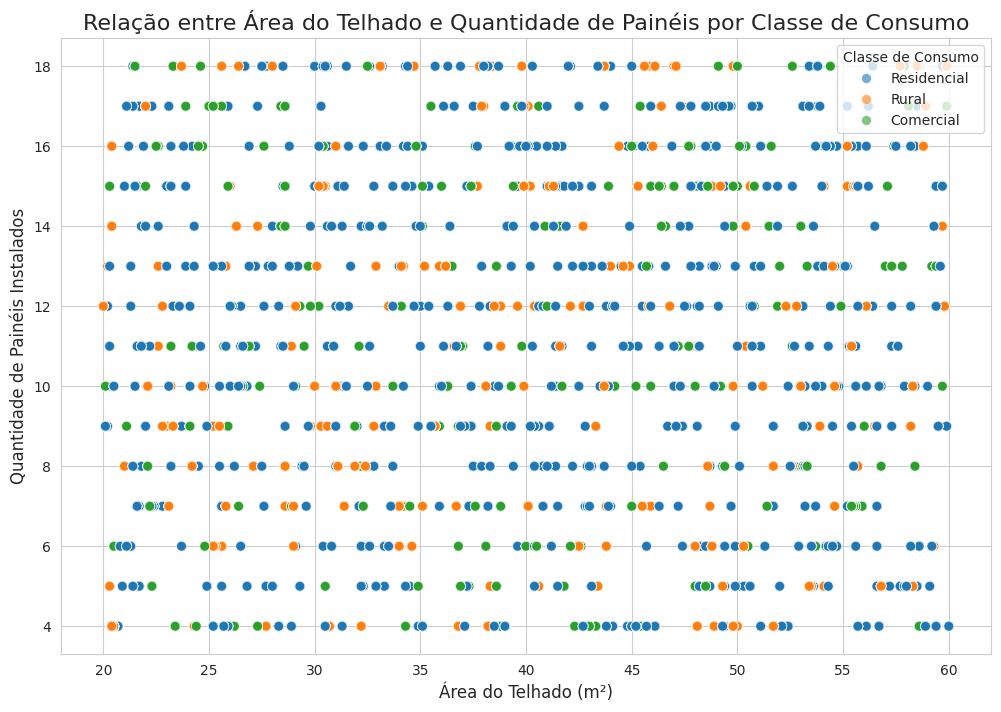

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Passo 1: Análise de Correlação Numérica ---

print("--- Análise de Correlação (Área do Telhado vs. Quantidade de Painéis) ---")

# Calcula a correlação geral no dataset inteiro
correlacao_geral = df_final['areaTelhado_m2'].corr(df_final['qtdPaineis'])
print(f"Correlação Geral: {correlacao_geral:.2f}")

print("\nCorrelação por Classe de Consumo:")
# Calcula a correlação para cada classe, iterando pelos valores únicos
for classe in df_final['classe_consumo'].unique():
    subset_df = df_final[df_final['classe_consumo'] == classe]
    corr_classe = subset_df['areaTelhado_m2'].corr(subset_df['qtdPaineis'])
    print(f"- {classe}: {corr_classe:.2f}")

print("\n" + "="*70 + "\n")


# --- Passo 2: Análise Visual com Gráfico de Dispersão ---

print("Gerando o gráfico de dispersão para análise visual...")

# Configura o estilo do gráfico
sns.set_style("whitegrid")

# Cria a figura e os eixos do gráfico
plt.figure(figsize=(12, 8))

# Cria o gráfico de dispersão com seaborn
# 'hue' colore os pontos de acordo com a classe de consumo
sns.scatterplot(
    data=df_final,
    x='areaTelhado_m2',
    y='qtdPaineis',
    hue='classe_consumo',
    alpha=0.6,  # Transparência para ver a densidade dos pontos
    s=50        # Tamanho dos pontos
)

# Adiciona títulos e rótulos para clareza
plt.title('Relação entre Área do Telhado e Quantidade de Painéis por Classe de Consumo', fontsize=16)
plt.xlabel('Área do Telhado (m²)', fontsize=12)
plt.ylabel('Quantidade de Painéis Instalados', fontsize=12)
plt.legend(title='Classe de Consumo')

# Exibe o gráfico
plt.show()

--- Análise de Correlação (Custo Mensal vs. Quantidade de Painéis) ---
Correlação Geral: 0.03

Correlação por Classe de Consumo:
- Residencial: 0.05
- Rural: 0.08
- Comercial: -0.10


Gerando o gráfico de dispersão para análise visual...


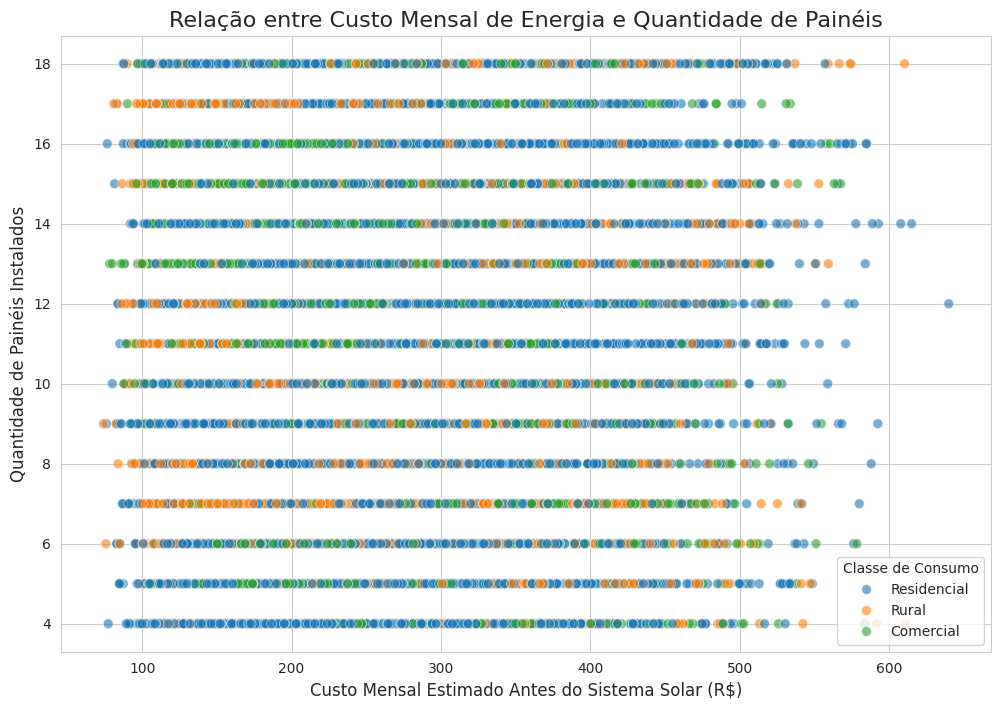

In [ ]:
# --- Passo 1: Engenharia de Atributos (Criar a variável de custo) ---
# Esta coluna representa a conta de luz que o proprietário pagaria sem o sistema solar.
df_final['custo_mensal_antes_solar_R$'] = df_final['ConsumoKWH'] * df_final['tarifa_aprox_R$']


# --- Passo 2: Análise de Correlação Numérica ---
print("--- Análise de Correlação (Custo Mensal vs. Quantidade de Painéis) ---")

# Calcula a correlação geral
correlacao_geral = df_final['custo_mensal_antes_solar_R$'].corr(df_final['qtdPaineis'])
print(f"Correlação Geral: {correlacao_geral:.2f}")

print("\nCorrelação por Classe de Consumo:")
# Calcula a correlação para cada classe de consumo
for classe in df_final['classe_consumo'].unique():
    subset_df = df_final[df_final['classe_consumo'] == classe]
    corr_classe = subset_df['custo_mensal_antes_solar_R$'].corr(subset_df['qtdPaineis'])
    print(f"- {classe}: {corr_classe:.2f}")

print("\n" + "="*70 + "\n")


# --- Passo 3: Análise Visual com Gráfico de Dispersão ---
print("Gerando o gráfico de dispersão para análise visual...")

# Configurações do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Cria o gráfico de dispersão
sns.scatterplot(
    data=df_final,
    x='custo_mensal_antes_solar_R$',
    y='qtdPaineis',
    hue='classe_consumo',
    alpha=0.6,
    s=50
)

# Títulos e rótulos
plt.title('Relação entre Custo Mensal de Energia e Quantidade de Painéis', fontsize=16)
plt.xlabel('Custo Mensal Estimado Antes do Sistema Solar (R$)', fontsize=12)
plt.ylabel('Quantidade de Painéis Instalados', fontsize=12)
plt.legend(title='Classe de Consumo')

# Exibe o gráfico
plt.show()

--- Tabela de Eficiência Média (kWh por Painel) por Classe e Orientação ---
classe_consumo     Comercial  Residencial  Rural
orientacaoTelhado                               
Norte                  31.57        33.44  34.08
Sul                    32.33        32.99  33.91
Nordeste               31.52        31.23  32.68
Leste                  33.21        30.51  33.23


Gerando o gráfico de barras para análise visual...


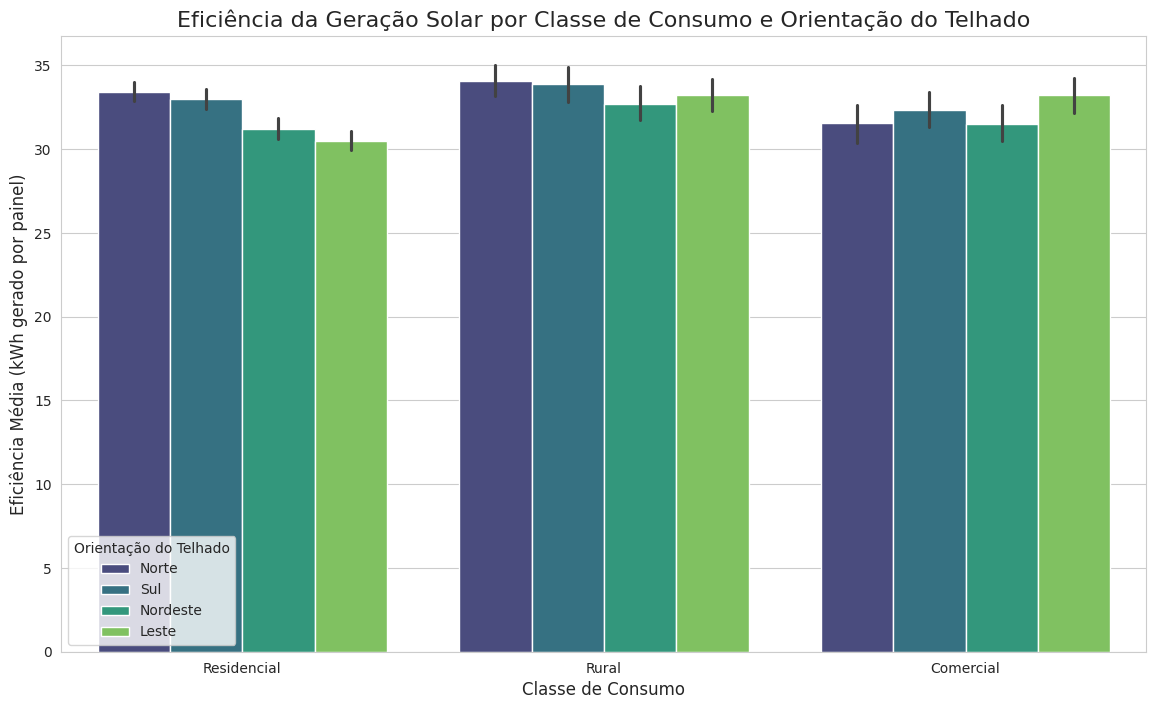

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Passo 1: Preparação - Garantir a Métrica de Eficiência ---
# É uma boa prática garantir que a coluna existe antes da análise.
if 'geracao_por_painel' not in df_final.columns:
    df_final['geracao_por_painel'] = df_final['kWhGerado'] / df_final['qtdPaineis']
    df_final.replace([np.inf, -np.inf], 0, inplace=True)


# --- Passo 2: Análise Numérica com Tabela Dinâmica ---
print("--- Tabela de Eficiência Média (kWh por Painel) por Classe e Orientação ---")

# Cria a tabela dinâmica para cruzar as informações
eficiencia_cruzada = pd.pivot_table(
    df_final,
    values='geracao_por_painel',
    index='orientacaoTelhado',  # As orientações serão as linhas
    columns='classe_consumo', # As colunas serão as classes de consumo
    aggfunc='mean'
).sort_values(by='Residencial', ascending=False) # Ordena pela eficiência da classe Residencial

print(eficiencia_cruzada.round(2))
print("\n" + "="*70 + "\n")


# --- Passo 3: Análise Visual com Gráfico de Barras Agrupado ---
print("Gerando o gráfico de barras para análise visual...")

# Configurações do gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Cria o gráfico de barras
# O Seaborn agrupa automaticamente os dados quando usamos 'hue'
sns.barplot(
    data=df_final,
    x='classe_consumo',
    y='geracao_por_painel',
    hue='orientacaoTelhado',
    palette='viridis',
    hue_order=eficiencia_cruzada.index # Usa a mesma ordem da tabela ordenada
)

# Títulos e rótulos
plt.title('Eficiência da Geração Solar por Classe de Consumo e Orientação do Telhado', fontsize=16)
plt.xlabel('Classe de Consumo', fontsize=12)
plt.ylabel('Eficiência Média (kWh gerado por painel)', fontsize=12)
plt.legend(title='Orientação do Telhado')

# Exibe o gráfico
plt.show()

--- Número Médio de Painéis por Instalação em Cada Estado ---
Estado
MG    11.63
PE    11.29
DF    11.29
RJ    11.14
SP    10.93
BA    10.88
CE    10.83
GO    10.76
Name: qtdPaineis, dtype: float64


--- Tabela: Nº Médio de Painéis por Estado e Classe de Consumo ---
classe_consumo  Comercial  Residencial  Rural
Estado                                       
BA                  12.52        10.33  11.09
CE                  11.56        10.89   9.77
DF                  11.13        11.27  11.52
GO                  10.97        10.44  11.21
MG                  11.30        11.85  11.16
PE                  10.63        11.14  12.42
RJ                  12.78        10.93  10.62
SP                  11.63        10.99  10.05


Gerando o gráfico de barras para os Top 10 estados: ['MG', 'PE', 'DF', 'RJ', 'SP', 'BA', 'CE', 'GO']...


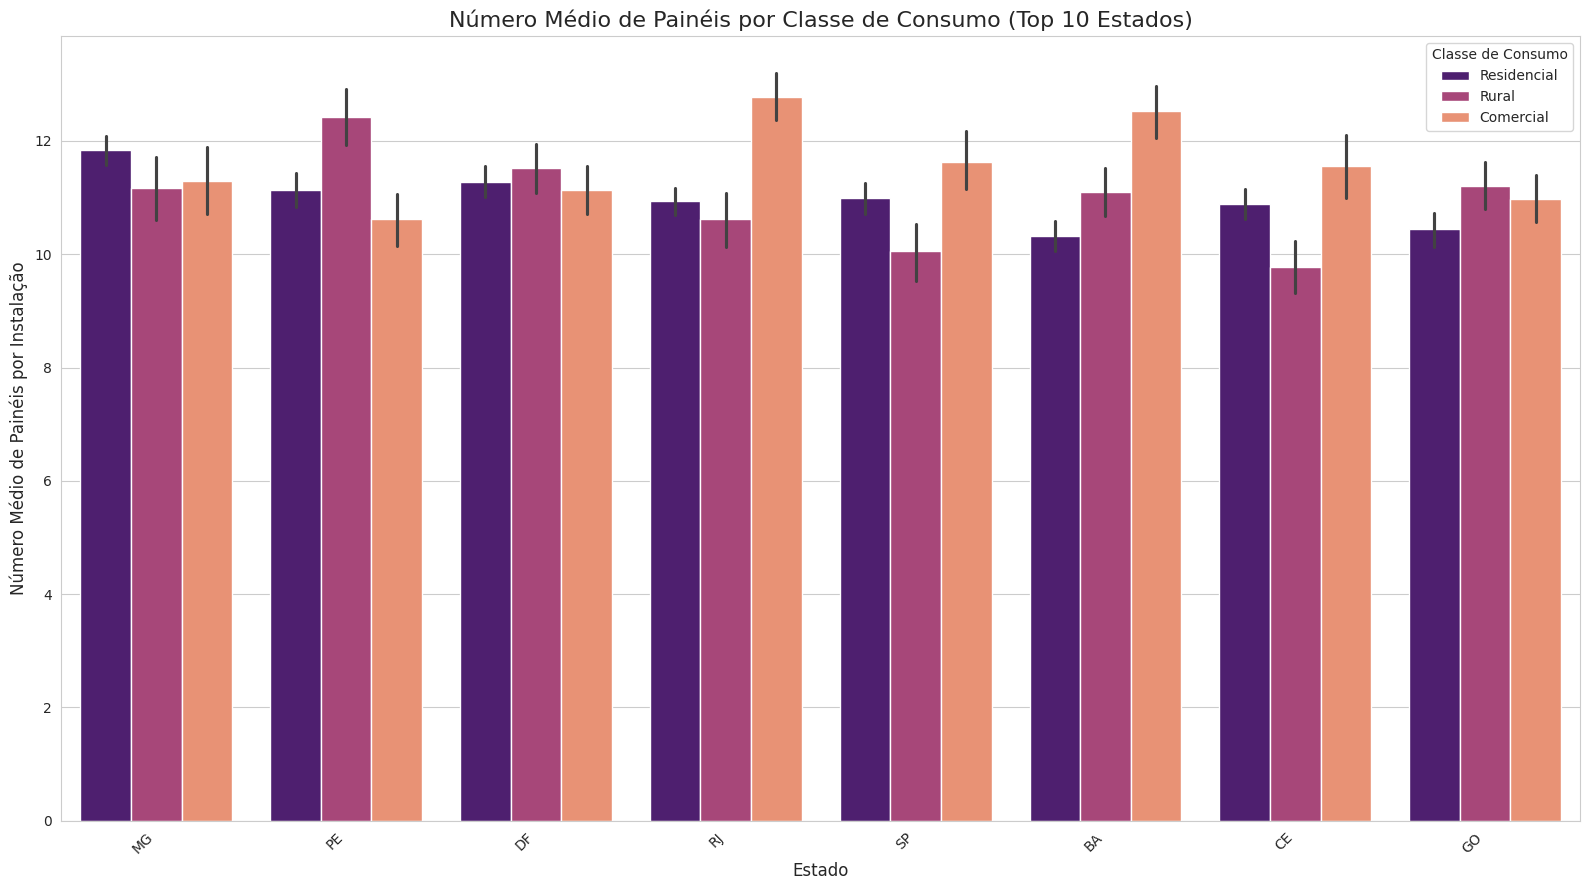

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Passo 1: Análise do Tamanho Médio da Instalação por Estado ---
print("--- Número Médio de Painéis por Instalação em Cada Estado ---")
media_paineis_estado = df_final.groupby('Estado')['qtdPaineis'].mean().sort_values(ascending=False)
print(media_paineis_estado.round(2))

# Guarda os 10 estados com maiores instalações para a visualização
top_10_estados = media_paineis_estado.head(10).index.tolist()

print("\n" + "="*70 + "\n")


# --- Passo 2: Análise Detalhada por Classe de Consumo (Tabela Dinâmica) ---
print("--- Tabela: Nº Médio de Painéis por Estado e Classe de Consumo ---")
media_detalhada = pd.pivot_table(
    df_final,
    values='qtdPaineis',
    index='Estado',
    columns='classe_consumo',
    aggfunc='mean'
)
# Preenche valores vazios (NaN) com 0 para clareza
print(media_detalhada.fillna(0).round(2))
print("\n" + "="*70 + "\n")


# --- Passo 3: Análise Visual para os Top 10 Estados ---
print(f"Gerando o gráfico de barras para os Top 10 estados: {top_10_estados}...")

# Filtra o DataFrame para conter apenas os dados dos Top 10 estados
df_top_10 = df_final[df_final['Estado'].isin(top_10_estados)]

# Configurações do gráfico
plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")

# Cria o gráfico de barras agrupado
sns.barplot(
    data=df_top_10,
    x='Estado',
    y='qtdPaineis',
    hue='classe_consumo',
    palette='magma',
    order=top_10_estados # Mantém a ordem do maior para o menor
)

# Títulos e rótulos
plt.title('Número Médio de Painéis por Classe de Consumo (Top 10 Estados)', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número Médio de Painéis por Instalação', fontsize=12)
plt.legend(title='Classe de Consumo')
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes dos estados para melhor leitura
plt.tight_layout() # Ajusta o layout para evitar sobreposição

# Exibe o gráfico
plt.show()

In [ ]:
import pandas as pd

# Agrupa os dados por classe de consumo e aplica as funções de agregação ('mean' e 'std')
# à coluna 'qtdPaineis'.
analise_estatistica_paineis = df_final.groupby('classe_consumo')['qtdPaineis'].agg(
    Media_Paineis=('mean'),
    Desvio_Padrao_Paineis=('std')
)

# Arredonda os resultados para 2 casas decimais, melhorando a visualização
analise_estatistica_paineis = analise_estatistica_paineis.round(2)

# Exibe a tabela final com os resultados
print("--- Análise Estatística do Número de Painéis por Classe de Consumo ---")
print(analise_estatistica_paineis)

--- Análise Estatística do Número de Painéis por Classe de Consumo ---
                Media_Paineis  Desvio_Padrao_Paineis
classe_consumo                                      
Comercial               11.49                   4.31
Residencial             10.99                   4.23
Rural                   11.03                   4.34


In [ ]:
import pandas as pd

# --- Cálculo da Área Média do Telhado por Classe de Consumo ---

print("--- Área Média do Telhado (m²) por Classe de Consumo ---")

# Agrupa os dados por classe e calcula a média da coluna 'areaTelhado_m2'
area_media_por_classe = df_final.groupby('classe_consumo')['areaTelhado_m2'].mean()

# Exibe o resultado arredondado para 2 casas decimais
print(area_media_por_classe.round(2))

--- Área Média do Telhado (m²) por Classe de Consumo ---
classe_consumo
Comercial      39.87
Residencial    40.28
Rural          39.65
Name: areaTelhado_m2, dtype: float64


--- Tabela: Custo Mensal Médio (R$) por Estado e Classe de Consumo ---
classe_consumo  Comercial  Residencial   Rural
Estado                                        
BA                 264.48       274.96  257.01
SP                 290.23       274.84  291.23
MG                 277.99       272.80  277.62
CE                 268.37       268.73  281.22
RJ                 255.95       268.14  248.77
GO                 258.42       267.31  243.04
DF                 296.33       267.20  290.71
PE                 252.69       261.33  237.58


Gerando o gráfico de barras para os Top 10 estados com maior custo residencial: ['BA', 'SP', 'MG', 'CE', 'RJ', 'GO', 'DF', 'PE']...


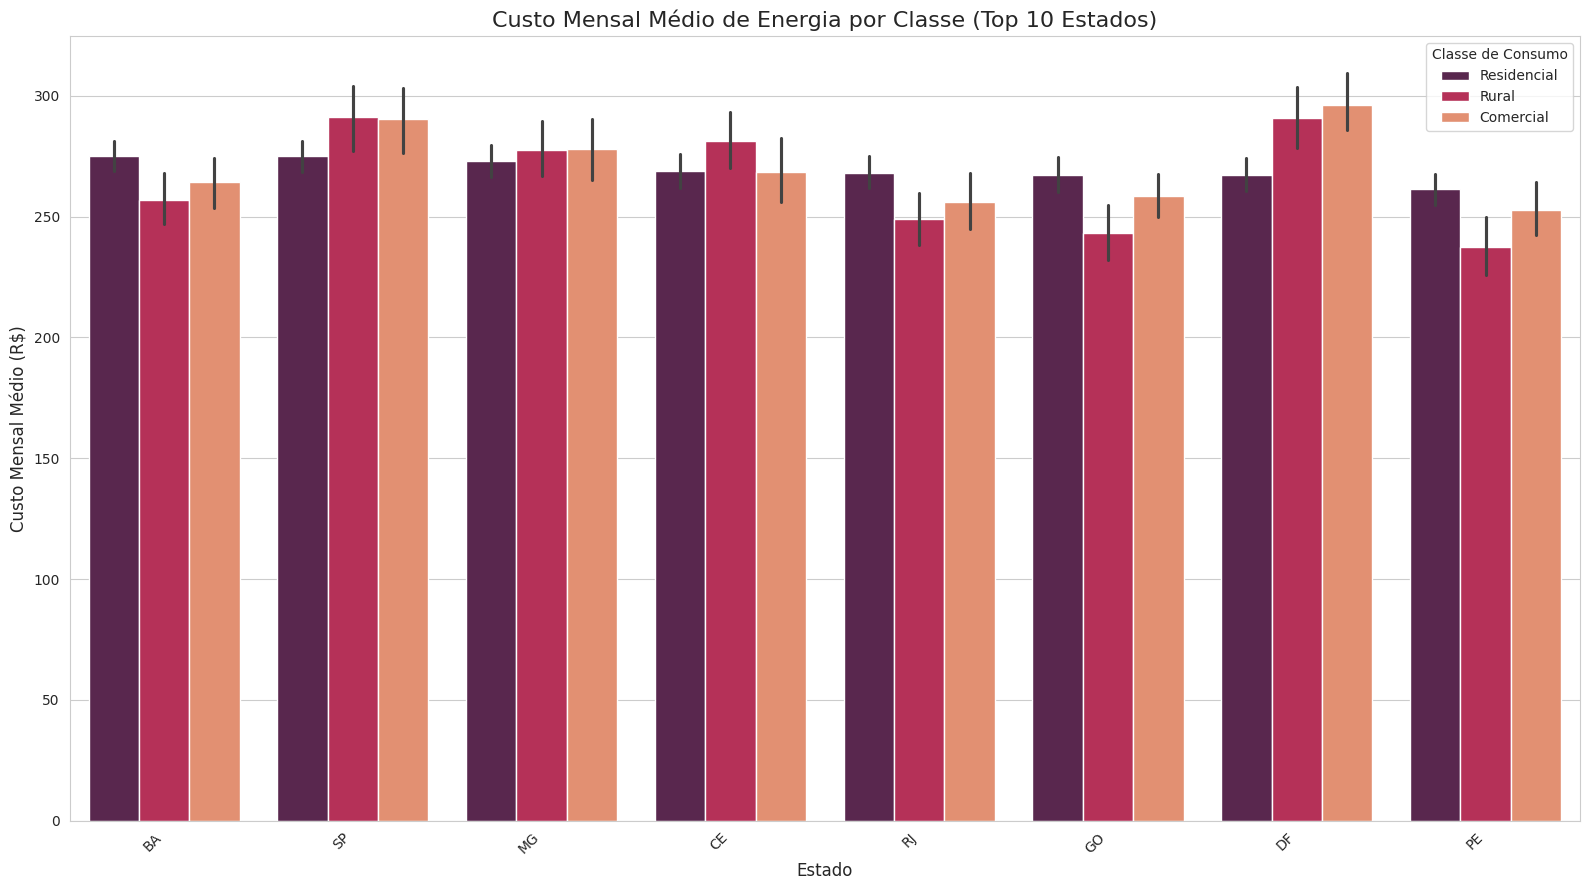

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Passo 1: Preparação - Garantir que a coluna de custo existe ---
if 'custo_mensal_antes_solar_R$' not in df_final.columns:
    df_final['custo_mensal_antes_solar_R$'] = df_final['ConsumoKWH'] * df_final['tarifa_aprox_R$']


# --- Passo 2: Análise Numérica com Tabela Dinâmica ---
print("--- Tabela: Custo Mensal Médio (R$) por Estado e Classe de Consumo ---")
custo_detalhado = pd.pivot_table(
    df_final,
    values='custo_mensal_antes_solar_R$',
    index='Estado',
    columns='classe_consumo',
    aggfunc='mean'
)

# Ordena pela classe Residencial para identificar os estados com maior custo para este segmento
custo_detalhado = custo_detalhado.sort_values(by='Residencial', ascending=False)
print(custo_detalhado.fillna(0).round(2))
print("\n" + "="*70 + "\n")


# --- Passo 3: Análise Visual para os Top 10 Estados com Maior Custo Residencial ---
# Pega os 10 estados do topo da nossa tabela ordenada
top_10_estados_custo = custo_detalhado.head(10).index.tolist()
print(f"Gerando o gráfico de barras para os Top 10 estados com maior custo residencial: {top_10_estados_custo}...")

# Filtra o DataFrame para a visualização
df_top_10_custo = df_final[df_final['Estado'].isin(top_10_estados_custo)]

# Configurações do gráfico
plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")

# Cria o gráfico de barras
sns.barplot(
    data=df_top_10_custo,
    x='Estado',
    y='custo_mensal_antes_solar_R$',
    hue='classe_consumo',
    palette='rocket',
    order=top_10_estados_custo # Mantém a ordem da tabela
)

# Títulos e rótulos
plt.title('Custo Mensal Médio de Energia por Classe (Top 10 Estados)', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Custo Mensal Médio (R$)', fontsize=12)
plt.legend(title='Classe de Consumo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [ ]:
import pandas as pd

# --- Cálculo do Consumo Médio Mensal por Classe de Consumo ---

print("--- Consumo Médio Mensal de Energia (kWh) por Classe ---")

# Agrupa por classe de consumo e calcula a média do consumo em kWh
consumo_medio_por_classe = df_final.groupby('classe_consumo')['ConsumoKWH'].mean()

# Exibe o resultado arredondado para 2 casas decimais
print(consumo_medio_por_classe.round(2))

--- Consumo Médio Mensal de Energia (kWh) por Classe ---
classe_consumo
Comercial      414.64
Residencial    416.75
Rural          404.33
Name: ConsumoKWH, dtype: float64


/tmp/ipython-input-1971917991.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
/tmp/ipython-input-1971917991.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


--- Consumo Médio Mensal de Energia (kWh) por Classe ---
classe_consumo_x
Comercial      414.64
Residencial    416.75
Rural          404.33
Name: ConsumoKWH, dtype: float64

Gerando a visualização...
Gráfico 'consumo_medio_por_classe.png' salvo com sucesso.


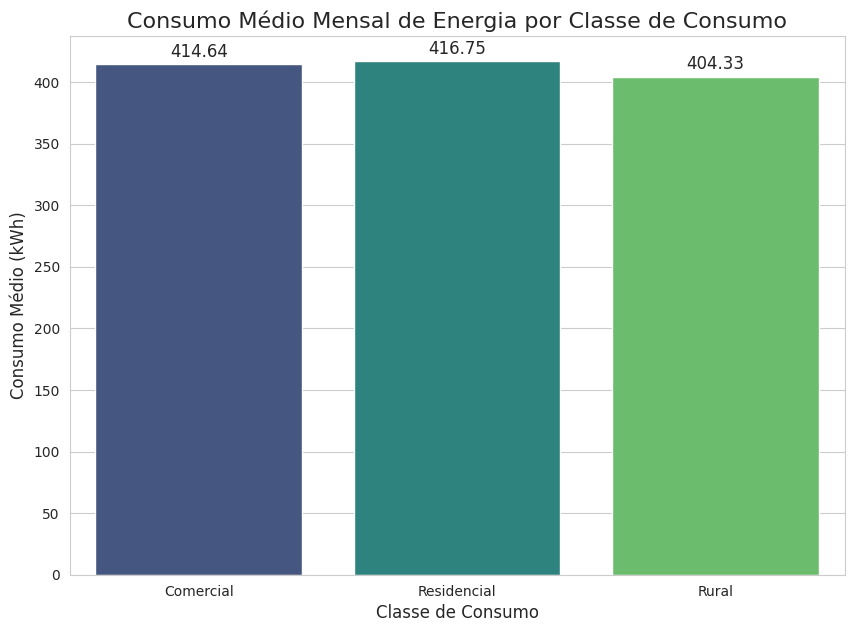

In [ ]:
# --- PASSO 0: CARREGAMENTO E PREPARAÇÃO DOS DADOS ---
# Este bloco recria o DataFrame completo do início.

import pandas as pd
import numpy as np

# Carregar os arquivos CSV iniciais
try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---

# Renomear colunas para consistência
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)

# Converter datas e extrair ano/mês
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)

# Limpar 'tipo_instalacao'
consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'bifásica', 'mono': 'monofásica'})
)

# Renomear a coluna de classe em 'residencias_df' para evitar conflito no merge
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---

# Unir produção e consumo para criar o balanço
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])

# Criar o DataFrame final unindo com os dados das residências
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')

# Limpeza final da coluna de classe de consumo no dataframe final
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)


# --- PASSO 1: ANÁLISE SOLICITADA ---
# Calcular o consumo médio mensal por classe de consumo

print("--- Consumo Médio Mensal de Energia (kWh) por Classe ---")
consumo_medio_por_classe = df_final.groupby('classe_consumo_x')['ConsumoKWH'].mean().round(2)
print(consumo_medio_por_classe)


# --- PASSO 2: VISUALIZAÇÃO DOS DADOS ---
# Gerar um gráfico de barras para a análise

import matplotlib.pyplot as plt
import seaborn as sns

print("\nGerando a visualização...")

# Preparar os dados para o gráfico
consumo_para_plot = consumo_medio_por_classe.reset_index()
consumo_para_plot.columns = ['Classe de Consumo', 'Consumo Médio (kWh)']

# Configurar o gráfico
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Criar o gráfico de barras
barplot = sns.barplot(
    data=consumo_para_plot,
    x='Classe de Consumo',
    y='Consumo Médio (kWh)',
    palette='viridis'
)

# Adicionar os valores no topo de cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=12)

# Títulos e rótulos
plt.title('Consumo Médio Mensal de Energia por Classe de Consumo', fontsize=16)
plt.xlabel('Classe de Consumo', fontsize=12)
plt.ylabel('Consumo Médio (kWh)', fontsize=12)

# Salvar a imagem do gráfico
plt.savefig('consumo_medio_por_classe.png')
print("Gráfico 'consumo_medio_por_classe.png' salvo com sucesso.")

Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Tabela de Consumo Médio (kWh) por Estado, Mês e Classe ---
classe_consumo_x  Comercial  Residencial   Rural
Estado mes                                      
BA     1             410.40       420.36  386.86
       2             418.17       426.49  394.84
       3             414.04       423.93  402.41
       4             415.42       423.95  394.92
       5             410.01       419.10  400.20
...                     ...          ...     ...
SP     8             455.53       414.05  441.50
       9             416.93       429.85  437.30
       10            453.67       420.71  433.82
       11            438.62       417.22  438.89
       12            457.65       425.16  438.18

[96 rows x 3 columns]

--- Meses de Maior e Menor Consumo por Estado e Classe ---

Classe: Comercial
        Mês de Pico de Consumo  Mês de Baixa de Consumo
Estado                                                 
BA        

/tmp/ipython-input-2290079216.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sazonalidade_detalhada = pd.pivot_table(



Gráfico 'padrao_sazonal_consumo.png' salvo com sucesso.


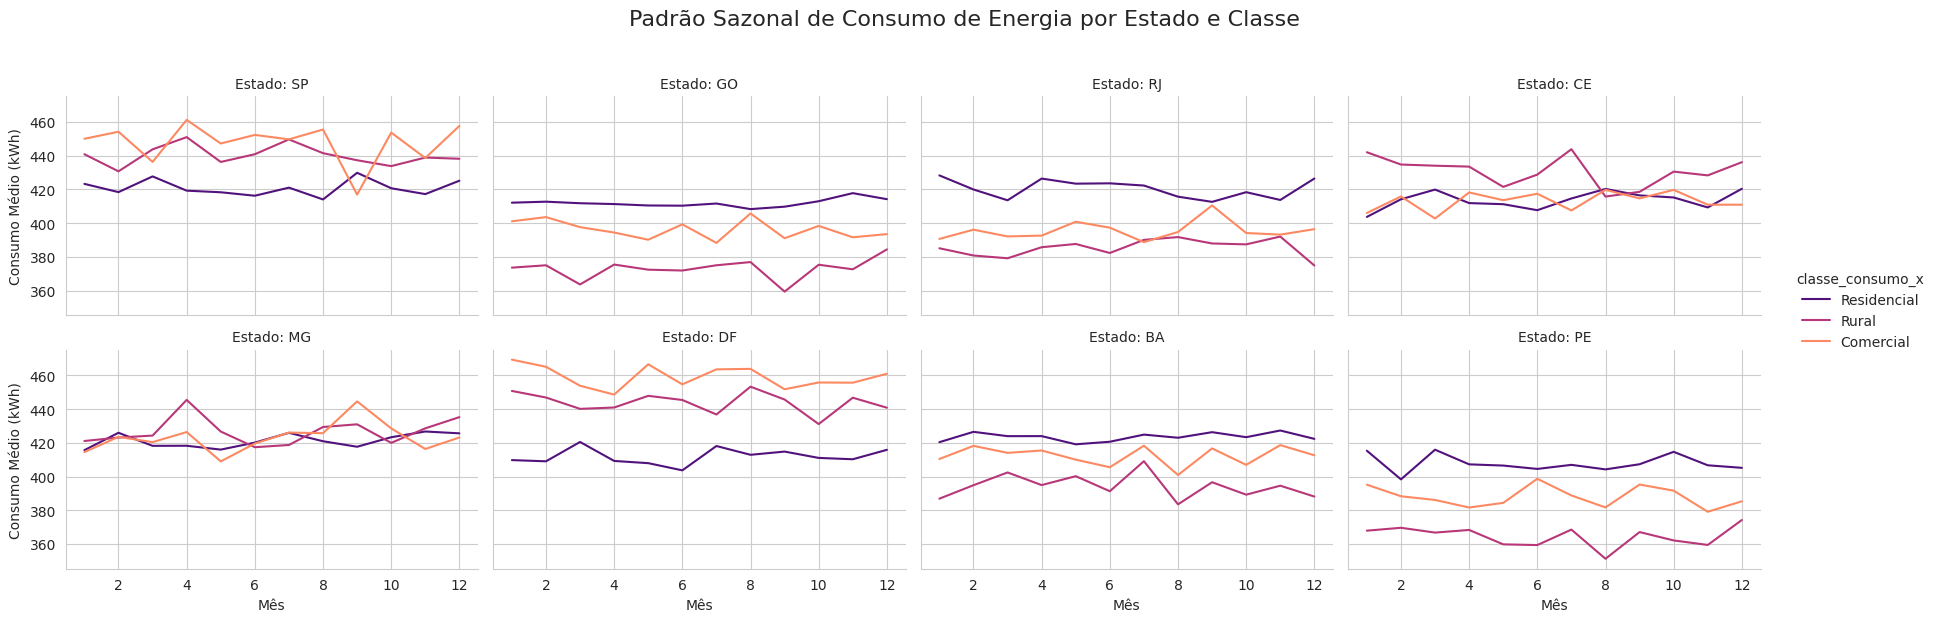

In [ ]:
# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')

# Limpeza final da coluna de classe de consumo
if 'classe_consumo_x' in df_final.columns:
    df_final['classe_consumo_x'] = (
        df_final['classe_consumo_x'].str.lower()
                                     .replace('resid.', 'residencial')
                                     .str.capitalize()
    )
print("DataFrame 'df_final' recriado e limpo com sucesso.")


# --- PASSO 1: ANÁLISE NUMÉRICA DA SAZONALIDADE COM TABELA DINÂMICA ---
print("\n--- Tabela de Consumo Médio (kWh) por Estado, Mês e Classe ---")

# Garante a ordem correta dos meses para a tabela
df_final['mes'] = pd.Categorical(df_final['mes'], categories=list(range(1, 13)), ordered=True)

# Cria a tabela dinâmica
sazonalidade_detalhada = pd.pivot_table(
    df_final,
    values='ConsumoKWH',
    index=['Estado', 'mes'],
    columns='classe_consumo_x',
    aggfunc='mean'
)
sazonalidade_detalhada = sazonalidade_detalhada.fillna(0).round(2)
print(sazonalidade_detalhada)


# --- PASSO 2: IDENTIFICAÇÃO DOS MESES DE PICO E BAIXA ---
print("\n--- Meses de Maior e Menor Consumo por Estado e Classe ---")

# Itera sobre cada classe de consumo para encontrar os picos e baixas
for classe in sazonalidade_detalhada.columns:
    # Agrupa por Estado e encontra o mês com o valor máximo/mínimo
    picos = sazonalidade_detalhada.groupby('Estado')[classe].idxmax().apply(lambda x: x[1])
    baixas = sazonalidade_detalhada.groupby('Estado')[classe].idxmin().apply(lambda x: x[1])

    resumo_sazonal = pd.DataFrame({
        'Mês de Pico de Consumo': picos,
        'Mês de Baixa de Consumo': baixas
    })
    print(f"\nClasse: {classe}")
    print(resumo_sazonal)


# --- PASSO 3: ANÁLISE VISUAL DO PADRÃO SAZONAL ---
print("\nGerando a visualização do padrão sazonal...")
import matplotlib.pyplot as plt
import seaborn as sns

# Cria múltiplos gráficos de linha (um por estado)
g = sns.relplot(
    data=df_final,
    x='mes',
    y='ConsumoKWH',
    hue='classe_consumo_x',
    col='Estado',  # Cria uma coluna de gráficos para cada estado
    kind='line',   # Define o tipo de gráfico como linha
    col_wrap=4,    # Quebra a linha a cada 4 gráficos
    height=3,
    aspect=1.5,
    palette='magma',
    errorbar=None  # Desativa a barra de erro para um visual mais limpo
)

# Ajusta os títulos e eixos
g.fig.suptitle('Padrão Sazonal de Consumo de Energia por Estado e Classe', y=1.03, fontsize=16)
g.set_axis_labels("Mês", "Consumo Médio (kWh)")
g.set_titles("Estado: {col_name}")
g.tight_layout()

# Salva a imagem do gráfico
plt.savefig('padrao_sazonal_consumo.png')
print("\nGráfico 'padrao_sazonal_consumo.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

Calculando o consumo de energia per capita...

--- Tabela de Consumo Médio Per Capita (kWh/Pessoa) ---
tipo_instalacao       Bifásica  Monofásica  Não indicada  Trifásica
classe_consumo_x mes                                               
Comercial        1      105.45      106.58        110.32     111.52
                 2      117.68      111.37        135.55      99.78
                 3      105.10      105.79        107.75     102.35
                 4      112.77      117.23        123.32     107.94
                 5       91.68      110.53        114.55     107.38
                 6      123.25      102.82        100.02     106.06
                 7      102.04      114.53        120.31      98.60
                 8      109.71      105.40        117.20      94.37
                 9      107.24      111.28        106.17  

/tmp/ipython-input-2434409451.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')


Gráfico 'consumo_per_capita_sazonal_com_tabela.png' salvo com sucesso.


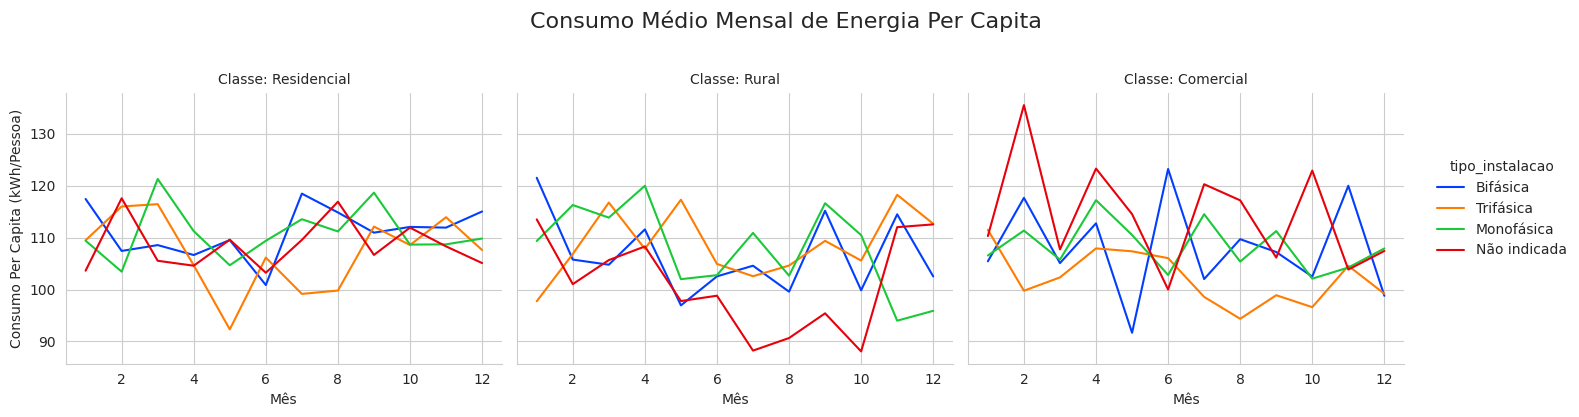

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'mes_referencia'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')

# Extração de ano/mês do datetime
df_final['mes'] = df_final['mes_referencia'].dt.month

df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final['tipo_instalacao'] = (
    df_final['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)
df_final.dropna(subset=['n_residentes', 'classe_consumo_x', 'tipo_instalacao'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: CALCULAR O CONSUMO PER CAPITA ---
print("\nCalculando o consumo de energia per capita...")
# Criamos a nova coluna dividindo o consumo total pelo número de residentes.
# Usamos .replace(0, np.nan) para evitar erros de divisão por zero.
df_final['consumo_per_capita'] = df_final['ConsumoKWH'] / df_final['n_residentes'].replace(0, np.nan)
df_final.dropna(subset=['consumo_per_capita'], inplace=True)


# --- PASSO 2: ANÁLISE NUMÉRICA (A TABELA) ---
print("\n--- Tabela de Consumo Médio Per Capita (kWh/Pessoa) ---")
# Cria a tabela pivotada para ver a média em cada segmento
tabela_per_capita = pd.pivot_table(
    df_final,
    values='consumo_per_capita',
    index=['classe_consumo_x', 'mes'], # Linhas: Classe e Mês
    columns='tipo_instalacao',       # Colunas: Tipo de Instalação
    aggfunc='mean'
)
# Garante a ordem correta dos meses
tabela_per_capita = tabela_per_capita.reindex(sorted(df_final['mes'].unique()), level=1)
print(tabela_per_capita.fillna(0).round(2))


# --- PASSO 3: ANÁLISE VISUAL (O GRÁFICO) ---
print("\nGerando o gráfico de consumo per capita...")
import matplotlib.pyplot as plt
import seaborn as sns

# Garante a ordem correta dos meses para o gráfico
df_final['mes'] = pd.Categorical(df_final['mes'], categories=list(range(1, 13)), ordered=True)

# sns.relplot é excelente para criar múltiplos gráficos relacionados
g = sns.relplot(
    data=df_final,
    x='mes',
    y='consumo_per_capita',
    hue='tipo_instalacao',
    col='classe_consumo_x',
    kind='line',
    height=4,
    aspect=1.2,
    palette='bright',
    errorbar=None
)

# Ajusta os títulos e eixos para maior clareza
g.fig.suptitle('Consumo Médio Mensal de Energia Per Capita', y=1.03, fontsize=16)
g.set_axis_labels("Mês", "Consumo Per Capita (kWh/Pessoa)")
g.set_titles("Classe: {col_name}")
g.tight_layout()

# Salva a imagem do gráfico
plt.savefig('consumo_per_capita_sazonal_com_tabela.png')
print("Gráfico 'consumo_per_capita_sazonal_com_tabela.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

Agrupando residências em faixas de número de moradores...

--- Tabela de Estatísticas do Consumo por Faixa de Moradores e Classe ---
                                   count    mean     std     min     25%  \
classe_consumo_x faixa_moradores                                           
Comercial        1-2               360.0  406.38  138.76  152.79  278.29   
                 2-4               804.0  416.32  137.35  157.23  289.41   
                 4-6               762.0  412.69  137.30  136.59  287.86   
                 6-7               390.0  422.63  138.16  162.16  298.53   
Residencial      1-2              1135.0  418.68  135.69  150.17  306.41   
                 2-4              2488.0  413.99  137.67  150.66  301.30   
                 4-6              2399.0  418.83  137.67  154.57  301.98   
                 6-7    

/tmp/ipython-input-4028205825.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
/tmp/ipython-input-4028205825.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(



Gráfico 'impacto_moradores_boxplot.png' salvo com sucesso.


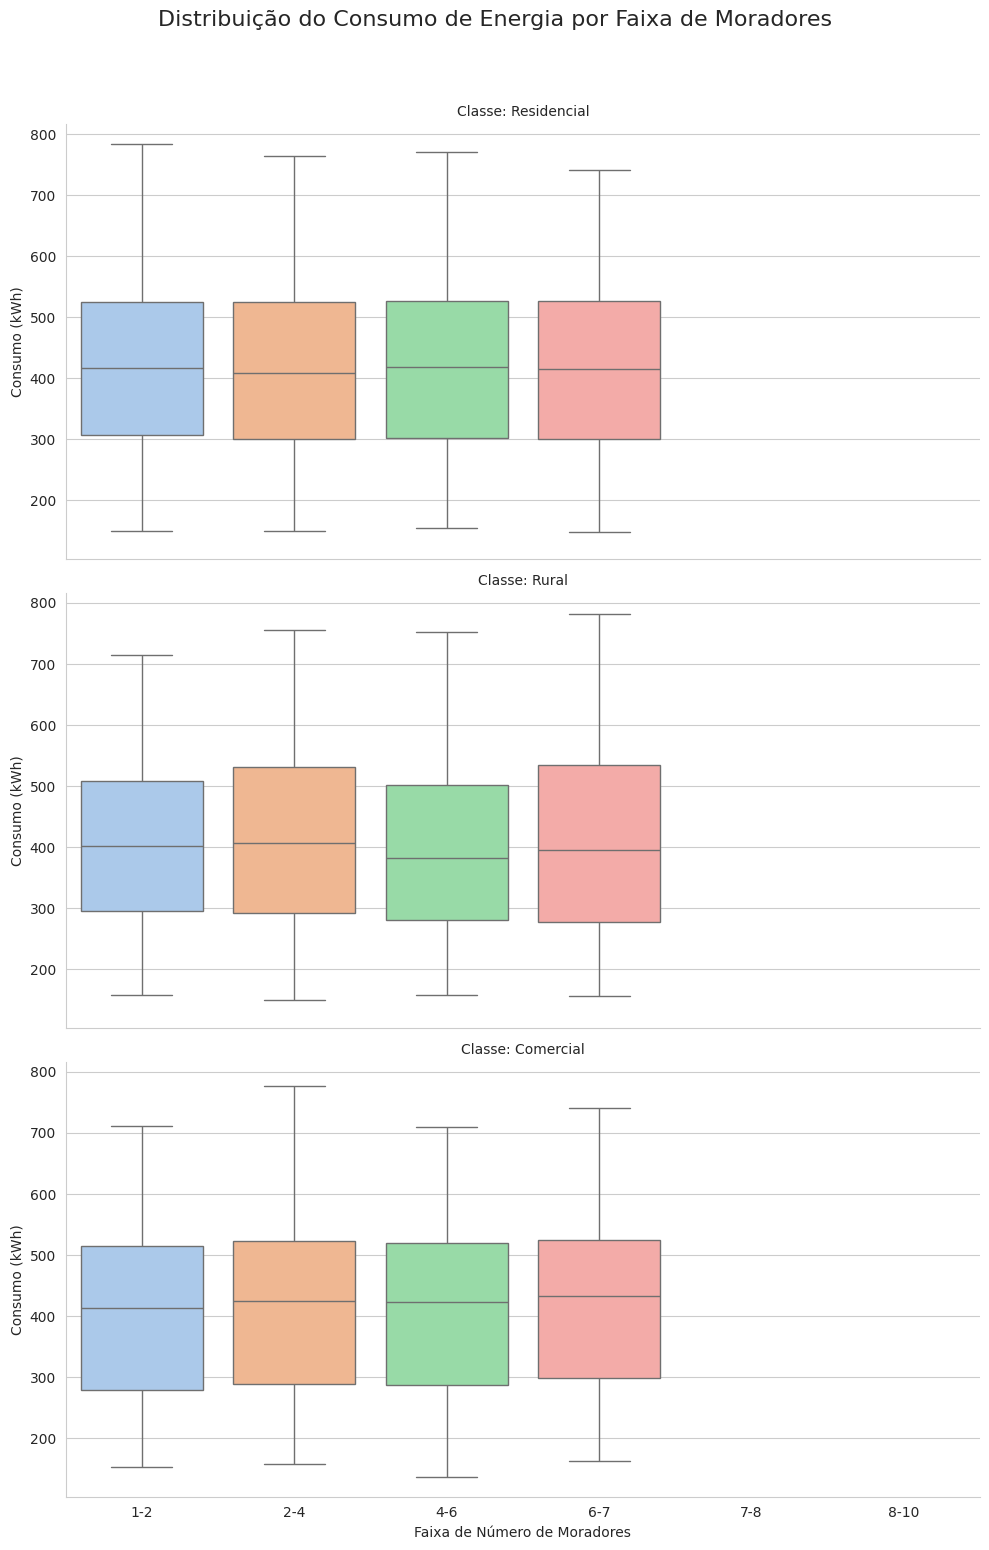

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'mes_referencia'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final['mes'] = pd.to_datetime(df_final['mes_referencia']).dt.month
df_final.dropna(subset=['n_residentes', 'classe_consumo_x'], inplace=True)
df_final['n_residentes'] = df_final['n_residentes'].astype(int)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: CRIAÇÃO DE FAIXAS DE MORADORES (BINNING) ---
print("\nAgrupando residências em faixas de número de moradores...")

# Lógica de binning robusta
max_moradores = df_final['n_residentes'].max()
bins = sorted(list(set(list(range(0, 11, 2)) + [max_moradores])))
if len(bins) > 1 and bins[0] == bins[1]:
    bins.pop(0)
labels = [f'{bins[i]+1 if bins[i] == 0 else bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
if not labels and max_moradores > 0: # Fallback para poucos dados
    labels = [f'1-{max_moradores}']
    bins = [0, max_moradores]

df_final['faixa_moradores'] = pd.cut(df_final['n_residentes'], bins=bins, labels=labels, right=True, include_lowest=True)
df_final.dropna(subset=['faixa_moradores'], inplace=True)


# --- PASSO 2: ANÁLISE NUMÉRICA (A TABELA) ---
print("\n--- Tabela de Estatísticas do Consumo por Faixa de Moradores e Classe ---")
# O método .describe() gera um resumo estatístico completo
tabela_descritiva = df_final.groupby(['classe_consumo_x', 'faixa_moradores'], observed=False)['ConsumoKWH'].describe()
print(tabela_descritiva.round(2))


# --- PASSO 3: ANÁLISE VISUAL (O BOX PLOT) ---
print("\nGerando o Box Plot para uma análise de distribuição...")
import matplotlib.pyplot as plt
import seaborn as sns

# Usamos catplot (categorical plot) com kind='box' para criar as facetas
g = sns.catplot(
    data=df_final,
    x='faixa_moradores',
    y='ConsumoKWH',
    col='classe_consumo_x', # Cria uma coluna de gráficos para cada classe
    kind='box',
    col_wrap=1,
    height=5,
    aspect=2,
    palette='pastel'
)

# Ajusta os títulos e eixos
g.fig.suptitle('Distribuição do Consumo de Energia por Faixa de Moradores', y=1.03, fontsize=16)
g.set_axis_labels("Faixa de Número de Moradores", "Consumo (kWh)")
g.set_titles("Classe: {col_name}")
g.tight_layout()

# Salva a imagem do gráfico
plt.savefig('impacto_moradores_boxplot.png')
print("\nGráfico 'impacto_moradores_boxplot.png' salvo com sucesso.")

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)

producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)

consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)

residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')

df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['tipo_instalacao', 'classe_consumo_x'], inplace=True)

print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: GERAÇÃO DA TABELA NUMÉRICA ---
print("\n--- Tabela de Consumo (kWh) por Classe e Tipo de Instalação ---")

# Cria uma tabela dinâmica para mostrar a média e a mediana do consumo
analise_numerica = pd.pivot_table(
    df_final,
    values='ConsumoKWH',
    index='classe_consumo_x',    # As linhas serão as classes de consumo
    columns='tipo_instalacao',   # As colunas serão os tipos de instalação
    aggfunc=['mean', 'median']   # Calcula a média e a mediana
)

# Arredonda os valores para 2 casas decimais e preenche valores nulos com 0
analise_numerica = analise_numerica.round(2).fillna(0)

# Exibe a tabela final
print(analise_numerica)

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Tabela de Consumo (kWh) por Classe e Tipo de Instalação ---
                     mean                                     median  \
tipo_instalacao  Bifásica Monofásica Não indicada Trifásica Bifásica   
classe_consumo_x                                                       
Comercial          418.14     413.95       421.66    401.71   423.26   
Residencial        420.00     417.61       412.67    412.43   418.57   
Rural              399.36     408.92       395.70    412.02   394.15   

                                                    
tipo_instalacao  Monofásica Não indicada Trifásica  
classe_consumo_x                                    
Comercial            427.08       441.62    404.74  
Residencial          416.99       410.65    411.07  
Rural                409.66       383.51    403.60  


/tmp/ipython-input-3817333434.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')


Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Tabela de Frequência: Tipo de Instalação por Classe de Consumo ---
tipo_instalacao   Bifásica  Monofásica  Não indicada  Trifásica
classe_consumo_x                                               
Comercial              763         742           418        393
Residencial           2452        2402          1152       1230
Rural                  767         834           401        446

--- Tipo de Instalação Mais Comum por Classe ---
classe_consumo_x
Comercial        Bifásica
Residencial      Bifásica
Rural          Monofásica
dtype: object

Gerando o gráfico da distribuição...


/tmp/ipython-input-851248513.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')



Gráfico 'distribuicao_tipo_instalacao.png' salvo com sucesso.


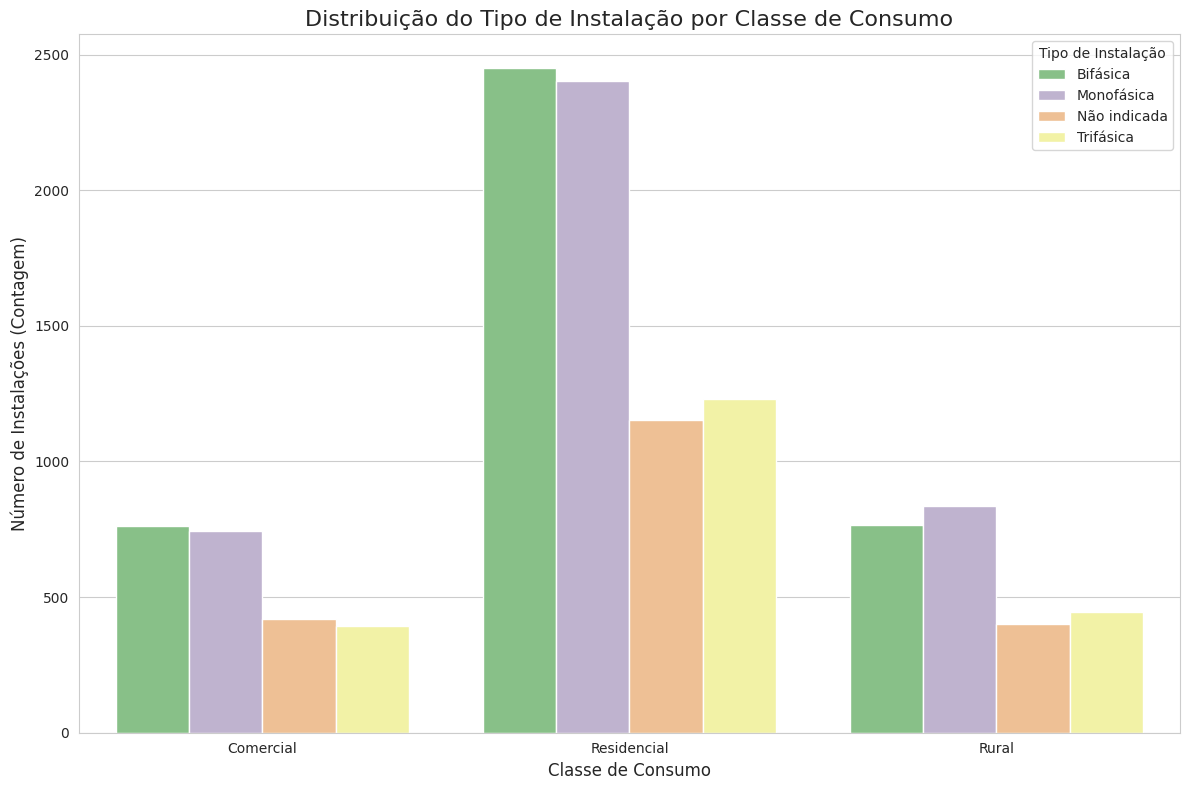

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)

producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)

consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)

residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')

df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['tipo_instalacao', 'classe_consumo_x'], inplace=True)

print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ANÁLISE NUMÉRICA COM TABELA DE REFERÊNCIA CRUZADA ---
print("\n--- Tabela de Frequência: Tipo de Instalação por Classe de Consumo ---")
# pd.crosstab é a função perfeita para contar a frequência entre duas categorias
frequencia_instalacao = pd.crosstab(
    index=df_final['classe_consumo_x'],
    columns=df_final['tipo_instalacao']
)
print(frequencia_instalacao)

# Encontra o tipo mais comum para cada classe
mais_comum = frequencia_instalacao.idxmax(axis=1)
print("\n--- Tipo de Instalação Mais Comum por Classe ---")
print(mais_comum)

# --- PASSO 2: VISUALIZAÇÃO DOS DADOS ---
print("\nGerando o gráfico da distribuição...")
import matplotlib.pyplot as plt
import seaborn as sns

# Reorganiza os dados para o formato 'longo', ideal para o Seaborn
frequencia_plot = frequencia_instalacao.reset_index().melt(id_vars='classe_consumo_x', var_name='Tipo de Instalação', value_name='Contagem')

# Configurações do gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Cria o gráfico de barras agrupado
sns.barplot(
    data=frequencia_plot,
    x='classe_consumo_x',
    y='Contagem',
    hue='Tipo de Instalação',
    palette='Accent'
)

# Títulos e rótulos
plt.title('Distribuição do Tipo de Instalação por Classe de Consumo', fontsize=16)
plt.xlabel('Classe de Consumo', fontsize=12)
plt.ylabel('Número de Instalações (Contagem)', fontsize=12)
plt.legend(title='Tipo de Instalação')
plt.tight_layout()

# Salva a imagem do gráfico
plt.savefig('distribuicao_tipo_instalacao.png')
print("\nGráfico 'distribuicao_tipo_instalacao.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Tabela de Consumo Médio (kWh) por Estado e Classe ---
classe_consumo_x  Comercial  Residencial   Rural
Estado                                          
BA                   412.29       423.46  394.30
CE                   413.12       413.74  430.66
DF                   459.11       411.91  443.84
GO                   396.23       411.97  372.99
MG                   423.13       421.18  426.72
PE                   387.99       407.71  364.52
RJ                   395.62       420.37  385.41
SP                   447.78       420.94  440.24

O menor consumo médio encontrado foi: 364.52 kWh
Gerando o novo gráfico com 'zoom' no eixo Y...


/tmp/ipython-input-1106837052.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')



Gráfico 'consumo_medio_por_estado_zoom.png' salvo com sucesso.


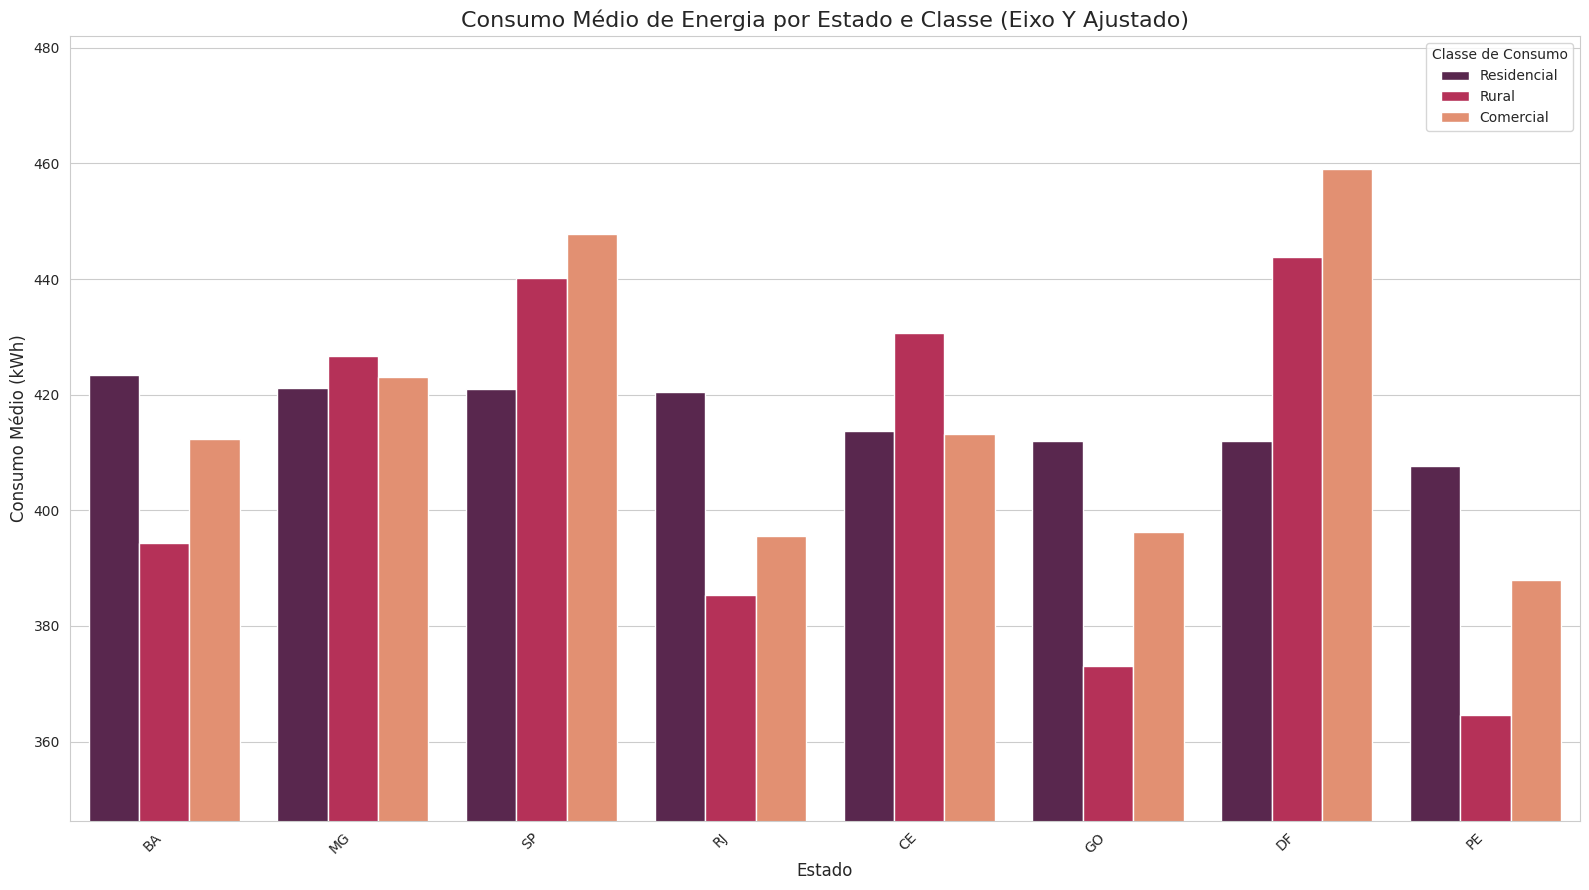

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)

producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)

consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)

residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')

df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['Estado', 'cidade', 'classe_consumo_x'], inplace=True)

print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: CÁLCULO E EXIBIÇÃO DA TABELA ---
# Cria a tabela pivotada com os valores médios de consumo
consumo_por_estado = pd.pivot_table(
    df_final,
    values='ConsumoKWH',
    index='Estado',
    columns='classe_consumo_x',
    aggfunc='mean'
)

# **NOVO TRECHO ADICIONADO**
# Imprime a tabela arredondada para fácil leitura
print("\n--- Tabela de Consumo Médio (kWh) por Estado e Classe ---")
print(consumo_por_estado.round(2))
# **FIM DO NOVO TRECHO**

# Encontra o menor valor médio de consumo em toda a tabela para o ajuste do gráfico
valor_minimo_geral = consumo_por_estado.min().min()
print(f"\nO menor consumo médio encontrado foi: {valor_minimo_geral:.2f} kWh")


# --- PASSO 2: GERAÇÃO DO GRÁFICO COM EIXO Y AJUSTADO ---
print("Gerando o novo gráfico com 'zoom' no eixo Y...")
import matplotlib.pyplot as plt
import seaborn as sns

# Define a ordem dos estados no gráfico com base no consumo residencial médio
ordem_estados = consumo_por_estado.sort_values(by='Residencial', ascending=False).index

plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")

sns.barplot(
    data=df_final,
    x='Estado',
    y='ConsumoKWH',
    hue='classe_consumo_x',
    order=ordem_estados,
    palette='rocket',
    errorbar=None
)

# --- AJUSTE DO EIXO Y ---
# A linha abaixo ajusta o limite inferior do eixo Y para 95% do menor valor
plt.ylim(bottom=valor_minimo_geral * 0.95)
# --- FIM DO AJUSTE ---


plt.title('Consumo Médio de Energia por Estado e Classe (Eixo Y Ajustado)', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Consumo Médio (kWh)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe de Consumo')
plt.tight_layout()

plt.savefig('consumo_medio_por_estado_zoom.png')
print("\nGráfico 'consumo_medio_por_estado_zoom.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Tabela de Dispersão do Consumo (Desvio Padrão em kWh) por Estado e Classe ---
classe_consumo_x  Comercial  Residencial   Rural
Estado                                          
BA                   131.48       139.48  132.65
CE                   163.84       145.54  130.22
DF                   119.76       139.22  134.28
GO                   132.75       130.08  142.49
MG                   140.53       139.60  133.41
PE                   140.72       135.97  150.89
RJ                   110.94       133.22  133.75
SP                   134.70       131.67  145.49

Gerando o gráfico com eixo Y ajustado...


/tmp/ipython-input-2059519072.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')



Gráfico 'dispersao_consumo_por_estado_zoom_com_tabela.png' salvo com sucesso.


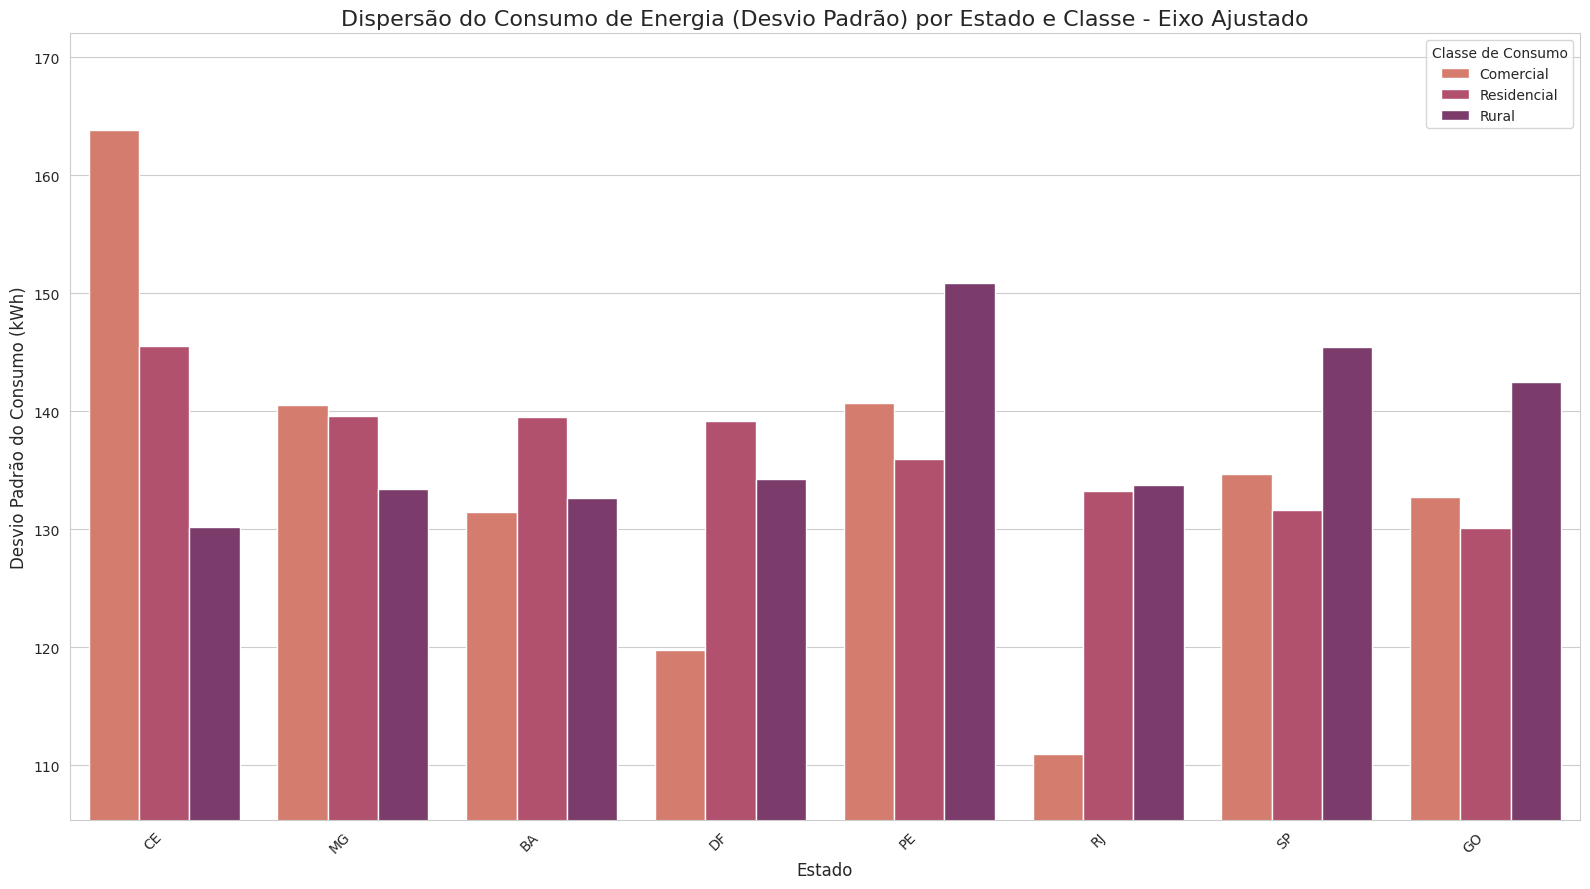

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)
consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['Estado', 'classe_consumo_x', 'tipo_instalacao'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ANÁLISE NUMÉRICA (A TABELA) ---
print("\n--- Tabela de Dispersão do Consumo (Desvio Padrão em kWh) por Estado e Classe ---")

# Cria a tabela dinâmica (pivot table) com o desvio padrão do consumo
tabela_dispersao = pd.pivot_table(
    df_final,
    values='ConsumoKWH',
    index='Estado',
    columns='classe_consumo_x',
    aggfunc='std'
).round(2)

print(tabela_dispersao)


# --- PASSO 2: VISUALIZAÇÃO COM EIXO Y AJUSTADO (O GRÁFICO) ---
print("\nGerando o gráfico com eixo Y ajustado...")
import matplotlib.pyplot as plt
import seaborn as sns

# Prepara os dados para o gráfico (transforma a tabela de formato largo para longo)
dados_plot = tabela_dispersao.reset_index().melt(
    id_vars='Estado',
    var_name='classe_consumo_x',
    value_name='Desvio_Padrao_Consumo'
)

# Encontra o menor valor de desvio padrão que será plotado para ajustar o eixo
valor_minimo = dados_plot['Desvio_Padrao_Consumo'].min()

# Ordena os estados pelo desvio padrão residencial para um gráfico mais organizado
ordem_estados = tabela_dispersao.sort_values(by='Residencial', ascending=False).index

plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")

sns.barplot(
    data=dados_plot,
    x='Estado',
    y='Desvio_Padrao_Consumo',
    hue='classe_consumo_x',
    order=ordem_estados,
    palette='flare'
)

# Ajusta o limite inferior do eixo Y para dar "zoom"
plt.ylim(bottom=valor_minimo * 0.95)

plt.title('Dispersão do Consumo de Energia (Desvio Padrão) por Estado e Classe - Eixo Ajustado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Desvio Padrão do Consumo (kWh)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe de Consumo')
plt.tight_layout()

plt.savefig('dispersao_consumo_por_estado_zoom_com_tabela.png')
print("\nGráfico 'dispersao_consumo_por_estado_zoom_com_tabela.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Produção Média Mensal de Energia Solar (kWh) por Classe ---
classe_consumo_x
Comercial      370.63
Residencial    355.07
Rural          363.69
Name: kWhGerado, dtype: float64

Gerando a visualização com eixo Y ajustado...


/tmp/ipython-input-1103837718.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
/tmp/ipython-input-1103837718.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(



Gráfico 'producao_media_por_classe_zoom.png' salvo com sucesso.


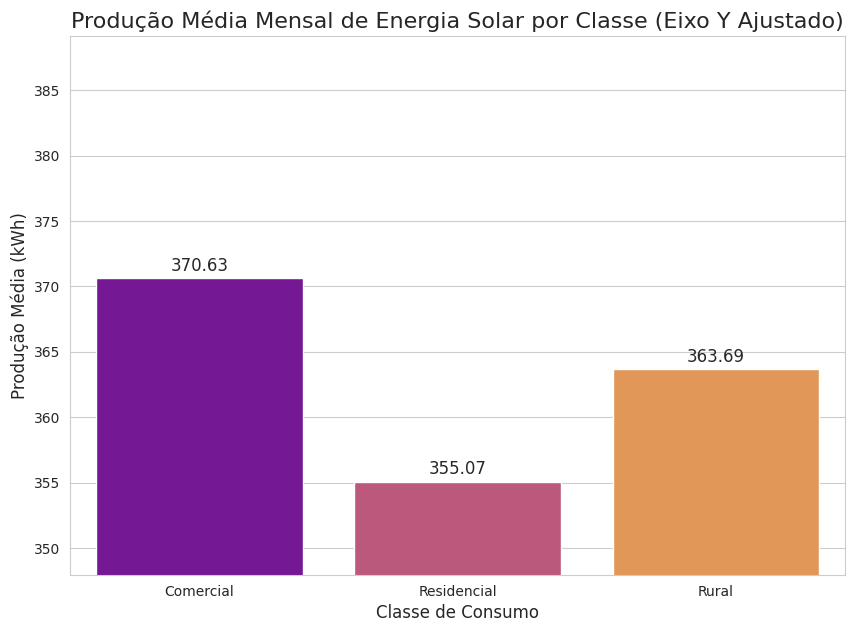

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)
consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['classe_consumo_x'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ANÁLISE DA PRODUÇÃO MÉDIA ---
print("\n--- Produção Média Mensal de Energia Solar (kWh) por Classe ---")
producao_media_por_classe = df_final.groupby('classe_consumo_x')['kWhGerado'].mean()
print(producao_media_por_classe.round(2))

# Encontra o menor valor para ajustar o eixo do gráfico
valor_minimo = producao_media_por_classe.min()


# --- PASSO 2: VISUALIZAÇÃO COM EIXO Y AJUSTADO ---
print("\nGerando a visualização com eixo Y ajustado...")
import matplotlib.pyplot as plt
import seaborn as sns

# Prepara os dados para o gráfico
producao_para_plot = producao_media_por_classe.reset_index()
producao_para_plot.columns = ['Classe de Consumo', 'Produção Média (kWh)']

# Configura o gráfico
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Cria o gráfico de barras
barplot = sns.barplot(
    data=producao_para_plot,
    x='Classe de Consumo',
    y='Produção Média (kWh)',
    palette='plasma'
)

# Adiciona os valores no topo de cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=12)

# --- A LINHA DE CÓDIGO MAIS IMPORTANTE ---
# Ajusta o limite inferior do eixo Y para 98% do menor valor, dando "zoom"
plt.ylim(bottom=valor_minimo * 0.98)
# -----------------------------------------

# Títulos e rótulos
plt.title('Produção Média Mensal de Energia Solar por Classe (Eixo Y Ajustado)', fontsize=16)
plt.xlabel('Classe de Consumo', fontsize=12)
plt.ylabel('Produção Média (kWh)', fontsize=12)

# Salva a imagem do gráfico
plt.savefig('producao_media_por_classe_zoom.png')
print("\nGráfico 'producao_media_por_classe_zoom.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Tabela de Tarifa Média (R$/kWh) por Estado e Classe ---
classe_consumo_x  Comercial  Residencial  Rural
Estado                                         
BA                     0.64         0.65   0.65
CE                     0.65         0.65   0.65
DF                     0.64         0.65   0.65
GO                     0.65         0.65   0.65
MG                     0.66         0.65   0.65
SP                     0.65         0.65   0.66
PE                     0.66         0.64   0.65
RJ                     0.65         0.64   0.65

Gerando o gráfico com eixo Y ajustado...


/tmp/ipython-input-1438404008.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')



Gráfico 'tarifa_media_por_estado_zoom.png' salvo com sucesso.


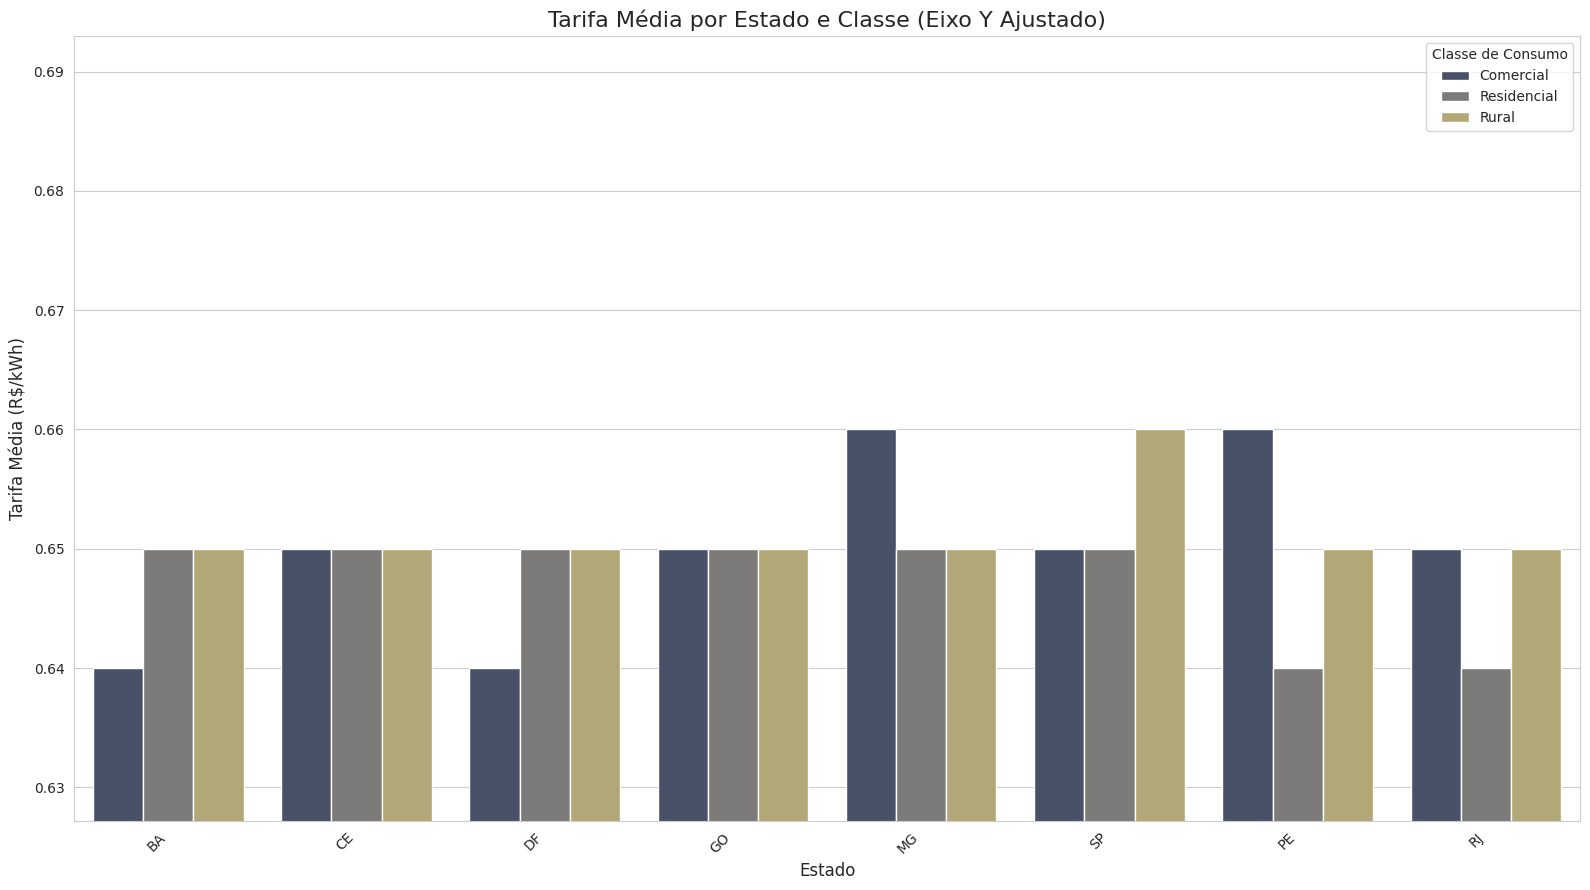

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)
consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['Estado', 'classe_consumo_x'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ANÁLISE NUMÉRICA (A TABELA) ---
print("\n--- Tabela de Tarifa Média (R$/kWh) por Estado e Classe ---")
tabela_tarifas = pd.pivot_table(
    df_final,
    values='tarifa_aprox_R$',
    index='Estado',
    columns='classe_consumo_x',
    aggfunc='mean'
).round(2)
# Ordena pela classe Residencial para identificar os estados com tarifas mais altas
tabela_tarifas = tabela_tarifas.sort_values(by='Residencial', ascending=False)
print(tabela_tarifas)


# --- PASSO 2: VISUALIZAÇÃO (O GRÁFICO "ZOOMADO") ---
print("\nGerando o gráfico com eixo Y ajustado...")
import matplotlib.pyplot as plt
import seaborn as sns

# Prepara os dados e encontra o valor mínimo para o 'zoom'
dados_plot = tabela_tarifas.reset_index().melt(
    id_vars='Estado',
    value_name='Tarifa Média (R$/kWh)'
)
valor_minimo = tabela_tarifas.min().min()

plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")

sns.barplot(
    data=dados_plot,
    x='Estado',
    y='Tarifa Média (R$/kWh)',
    hue='classe_consumo_x',
    order=tabela_tarifas.index,
    palette='cividis'
)

# Ajusta o limite inferior do eixo Y para 98% do menor valor, dando "zoom"
plt.ylim(bottom=valor_minimo * 0.98)

plt.title('Tarifa Média por Estado e Classe (Eixo Y Ajustado)', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Tarifa Média (R$/kWh)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe de Consumo')
plt.tight_layout()

plt.savefig('tarifa_media_por_estado_zoom.png')
print("\nGráfico 'tarifa_media_por_estado_zoom.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

Iniciando análise de Machine Learning para identificar os fatores mais importantes...


/tmp/ipython-input-3331611547.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
/tmp/ipython-input-3331611547.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['orientacaoTelhado'].fillna('Não informada', inplace=True)


Treinando o modelo de RandomForest...
Extraindo a importância de cada fator...

--- Top 15 Fatores Mais Influentes na Geração de Energia Solar ---
                            Feature  Importance
0                        qtdPaineis    0.585931
1                    areaTelhado_m2    0.142292
2                               mes    0.017325
7   orientacaoTelhado_Não informada    0.014954
6           orientacaoTelhado_Norte    0.011373
44     classe_consumo_x_Residencial    0.011129
33                  cidade_Salvador    0.010774
5        orientacaoTelhado_Nordeste    0.010353
3                      n_residentes    0.010080
8             orientacaoTelhado_Sul    0.010060
16                        Estado_SP    0.009487
45           classe_consumo_x_Rural    0.008743
43       classe_consumo_x_Comercial    0.008294
9                         Estado_BA    0.007644
17                  cidade_Anápolis    0.007436

Gerando o gráfico de importância dos fatores...


/tmp/ipython-input-3331611547.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



Gráfico 'importancia_features_geracao.png' salvo com sucesso.


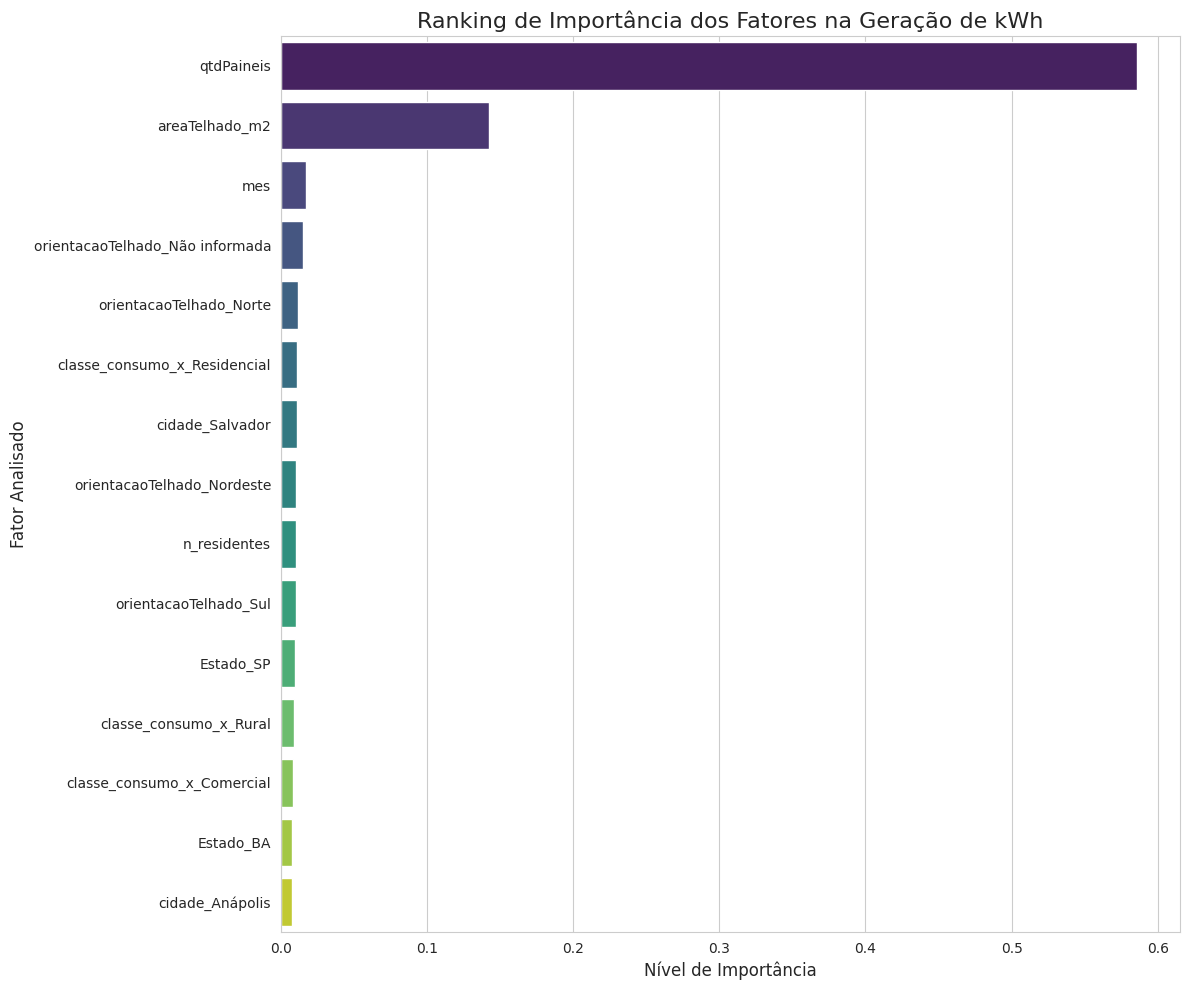

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPA E PREPARAÇÃO DOS DADOS ---
# Recria o DataFrame 'df_final' e o prepara para a modelagem.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)
consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
# Preenche valores nulos em 'orientacaoTelhado' para a modelagem
df_final['orientacaoTelhado'].fillna('Não informada', inplace=True)
# Remove linhas onde colunas essenciais são nulas
df_final.dropna(subset=['kWhGerado', 'qtdPaineis', 'areaTelhado_m2', 'Estado', 'cidade', 'tipo_instalacao', 'classe_consumo_x'], inplace=True)

print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ANÁLISE COM MACHINE LEARNING (IMPORTÂNCIA DE FEATURES) ---
print("\nIniciando análise de Machine Learning para identificar os fatores mais importantes...")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Seleção das Variáveis (Features) e do Alvo (Target)
features = [
    'orientacaoTelhado', 'qtdPaineis', 'areaTelhado_m2', 'Estado', 'cidade',
    'tipo_instalacao', 'classe_consumo_x', 'mes', 'n_residentes'
]
target = 'kWhGerado'

# Separa as features (X) e o alvo (y)
X = df_final[features]
y = df_final[target]

# 2. Pré-processamento: One-Hot Encoding para variáveis categóricas
# Isso transforma texto em colunas numéricas (0s e 1s) para o modelo entender
X_encoded = pd.get_dummies(X, columns=['orientacaoTelhado', 'Estado', 'cidade', 'tipo_instalacao', 'classe_consumo_x'])

# 3. Treinamento do Modelo
print("Treinando o modelo de RandomForest...")
# RandomForest é um modelo poderoso que consegue capturar relações complexas
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

# 4. Extração da Importância das Features
print("Extraindo a importância de cada fator...")
importances = model.feature_importances_
feature_names = X_encoded.columns

# Cria um DataFrame para visualizar os resultados
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# --- PASSO 2: EXIBIÇÃO DOS RESULTADOS ---
print("\n--- Top 15 Fatores Mais Influentes na Geração de Energia Solar ---")
print(feature_importance_df.head(15))


# --- PASSO 3: VISUALIZAÇÃO DOS RESULTADOS ---
print("\nGerando o gráfico de importância dos fatores...")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

# Cria o gráfico de barras horizontais com os 15 principais fatores
sns.barplot(
    data=feature_importance_df.head(15),
    x='Importance',
    y='Feature',
    palette='viridis'
)

plt.title('Ranking de Importância dos Fatores na Geração de kWh', fontsize=16)
plt.xlabel('Nível de Importância', fontsize=12)
plt.ylabel('Fator Analisado', fontsize=12)
plt.tight_layout()

plt.savefig('importancia_features_geracao.png')
print("\nGráfico 'importancia_features_geracao.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Produção Média Mensal de Energia Solar (kWh) por Classe ---
classe_consumo_x
Comercial      370.63
Residencial    355.07
Rural          363.69
Name: kWhGerado, dtype: float64

Gerando a visualização com eixo Y ajustado para maior discrepância...


/tmp/ipython-input-3877519235.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
/tmp/ipython-input-3877519235.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(



Gráfico 'producao_media_por_classe_zoom_maior.png' salvo com sucesso.


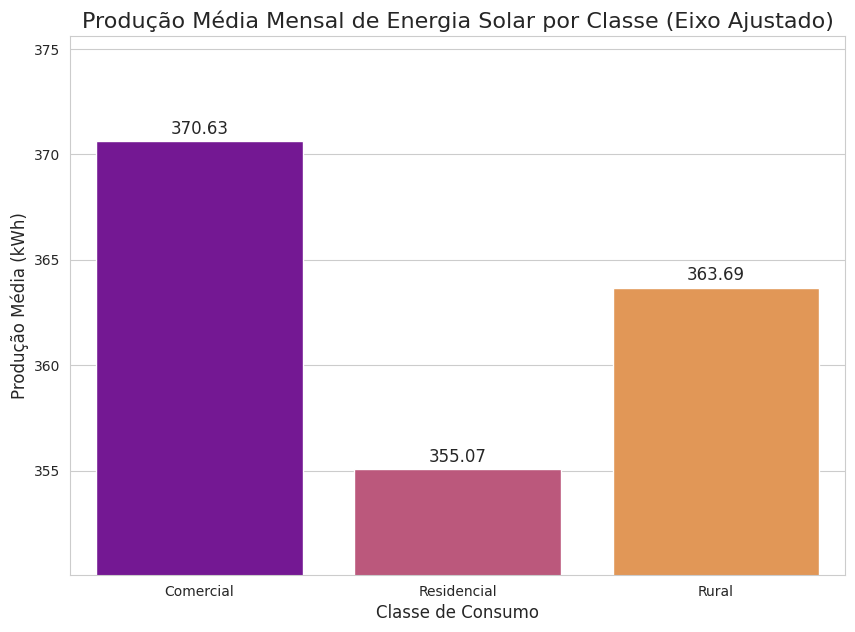

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)
consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['classe_consumo_x'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ANÁLISE DA PRODUÇÃO MÉDIA ---
print("\n--- Produção Média Mensal de Energia Solar (kWh) por Classe ---")
producao_media_por_classe = df_final.groupby('classe_consumo_x')['kWhGerado'].mean()
print(producao_media_por_classe.round(2))
# Encontra o menor valor médio que será plotado para ajustar o eixo
valor_minimo = producao_media_por_classe.min()
valor_maximo = producao_media_por_classe.max()


# --- PASSO 2: VISUALIZAÇÃO COM EIXO Y AJUSTADO PARA MÁXIMA DISCREPÂNCIA ---
print("\nGerando a visualização com eixo Y ajustado para maior discrepância...")
import matplotlib.pyplot as plt
import seaborn as sns

# Prepara os dados para o gráfico
producao_para_plot = producao_media_por_classe.reset_index()
producao_para_plot.columns = ['Classe de Consumo', 'Produção Média (kWh)']

# Configura o gráfico
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Cria o gráfico de barras
barplot = sns.barplot(
    data=producao_para_plot,
    x='Classe de Consumo',
    y='Produção Média (kWh)',
    palette='plasma'
)

# --- AJUSTE DO EIXO Y PARA MÁXIMA DISCREPÂNCIA ---
# Começa o eixo Y um pouco abaixo do menor valor e termina um pouco acima do maior
plt.ylim(bottom=valor_minimo - 5, top=valor_maximo + 5)
# --------------------------------------------------

# Adiciona os valores no topo de cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=12)

# Títulos e rótulos
plt.title('Produção Média Mensal de Energia Solar por Classe (Eixo Ajustado)', fontsize=16)
plt.xlabel('Classe de Consumo', fontsize=12)
plt.ylabel('Produção Média (kWh)', fontsize=12)

# Salva a imagem do gráfico
plt.savefig('producao_media_por_classe_zoom_maior.png')
print("\nGráfico 'producao_media_por_classe_zoom_maior.png' salvo com sucesso.")

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    # Carrega os arquivos CSV
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
# Renomeia colunas para consistência
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)

# Converte datas e extrai ano/mês
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)

# Limpa a coluna 'tipo_instalacao'
consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)

# Renomeia a coluna 'classe_consumo' para evitar conflitos no merge
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
# Une produção e consumo
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
# Une com dados das residências para criar o DataFrame final
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')

# Limpa e padroniza a coluna 'classe_consumo_x' no DataFrame final
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
# Remove linhas com dados faltantes essenciais para a análise
df_final.dropna(subset=['classe_consumo_x', 'qtdPaineis'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: CÁLCULO DAS MÉTRICAS NECESSÁRIAS ---
print("\nCalculando as métricas para a análise de dimensionamento...")
# 1. Consumo médio por classe
consumo_medio = df_final.groupby('classe_consumo_x')['ConsumoKWH'].mean()

# 2. Geração média por painel para cada classe (Total Gerado / Total de Painéis)
total_gerado = df_final.groupby('classe_consumo_x')['kWhGerado'].sum()
total_paineis = df_final.groupby('classe_consumo_x')['qtdPaineis'].sum()
geracao_por_painel = total_gerado / total_paineis


# --- PASSO 2: CÁLCULO E APRESENTAÇÃO DA TABELA FINAL ---
# Divide o consumo médio pela eficiência de um painel
paineis_necessarios = consumo_medio / geracao_por_painel

# Cria uma tabela resumo para apresentar os resultados de forma clara
tabela_resumo = pd.DataFrame({
    'Consumo_Medio_kWh': consumo_medio.round(2),
    'Geracao_Media_por_Painel_kWh': geracao_por_painel.round(2),
    'Paineis_Necessarios_p_100%': paineis_necessarios.round(0) # Arredonda para o número inteiro de painéis
})
print("\n--- Análise de Dimensionamento para 100% de Autossuficiência ---")
print(tabela_resumo)

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

Calculando as métricas para a análise de dimensionamento...

--- Análise de Dimensionamento para 100% de Autossuficiência ---
                  Consumo_Medio_kWh  Geracao_Media_por_Painel_kWh  \
classe_consumo_x                                                    
Comercial                    414.64                         32.27   
Residencial                  416.75                         32.32   
Rural                        404.33                         32.97   

                  Paineis_Necessarios_p_100%  
classe_consumo_x                              
Comercial                               13.0  
Residencial                             13.0  
Rural                                   12.0  


/tmp/ipython-input-1767641146.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')


In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['Estado', 'classe_consumo_x'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ANÁLISE DA VARIAÇÃO DA TARIFA ---
print("\n--- Parte 1: Análise da Variação da Tarifa Média ---")

# Tarifa média geral (baseline)
tarifa_media_geral = df_final['tarifa_aprox_R$'].mean()
print(f"Tarifa Média Geral (para todo o dataset): R$ {tarifa_media_geral:.4f}")

# Tabela de tarifas por grupo
tarifas_por_grupo = pd.pivot_table(
    df_final,
    values='tarifa_aprox_R$',
    index='Estado',
    columns='classe_consumo_x',
    aggfunc='mean'
)
print("\nTabela de Tarifas Médias por Grupo (R$/kWh):")
print(tarifas_por_grupo.round(4))

# Estatísticas da variação das tarifas médias
min_tarifa_grupo = tarifas_por_grupo.min().min()
max_tarifa_grupo = tarifas_por_grupo.max().max()
std_tarifa_grupo = tarifas_por_grupo.stack().std()
print(f"\nMenor tarifa média de um grupo: R$ {min_tarifa_grupo:.4f}")
print(f"Maior tarifa média de um grupo: R$ {max_tarifa_grupo:.4f}")
print(f"Desvio Padrão das tarifas médias: R$ {std_tarifa_grupo:.4f}")


# --- PASSO 2: SIMULAÇÃO DO IMPACTO NA ECONOMIA GERADA ---
print("\n--- Parte 2: Simulação do Impacto no Cálculo da Economia Total ---")

# Cenário 1: Usando a tarifa média geral
total_kwh_gerado = df_final['kWhGerado'].sum()
economia_cenario_1 = total_kwh_gerado * tarifa_media_geral
print(f"Cenário 1 (Tarifa Média Única): Economia Total Estimada = R$ {economia_cenario_1:,.2f}")

# Cenário 2: Usando a tarifa específica de cada grupo
# Agrupa para obter a geração total e a tarifa média de cada grupo
calculo_especifico = df_final.groupby(['Estado', 'classe_consumo_x']).agg(
    Total_Gerado=('kWhGerado', 'sum'),
    Tarifa_Media=('tarifa_aprox_R$', 'mean')
)
# Calcula a economia para cada grupo e soma tudo
calculo_especifico['Economia_Especifica'] = calculo_especifico['Total_Gerado'] * calculo_especifico['Tarifa_Media']
economia_cenario_2 = calculo_especifico['Economia_Especifica'].sum()
print(f"Cenário 2 (Tarifa Específica por Grupo): Economia Total Estimada = R$ {economia_cenario_2:,.2f}")

# --- CONCLUSÃO ---
diferenca_absoluta = economia_cenario_2 - economia_cenario_1
diferenca_percentual = (diferenca_absoluta / economia_cenario_1) * 100

print("\n--- Conclusão da Análise de Impacto ---")
print(f"Diferença Absoluta entre os Cenários: R$ {diferenca_absoluta:,.2f}")
print(f"Diferença Percentual: {diferenca_percentual:.4f}%")
if abs(diferenca_percentual) < 1:
    print("\nResultado: A diferença é muito pequena (< 1%). Portanto, a variação na tarifa média entre os grupos NÃO impacta significativamente o cálculo da economia gerada.")
else:
    print("\nResultado: A diferença é superior a 1%. Portanto, a variação na tarifa média entre os grupos IMPACTA o cálculo da economia gerada.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Parte 1: Análise da Variação da Tarifa Média ---
Tarifa Média Geral (para todo o dataset): R$ 0.6487

Tabela de Tarifas Médias por Grupo (R$/kWh):
classe_consumo_x  Comercial  Residencial   Rural
Estado                                          
BA                   0.6418       0.6486  0.6492
CE                   0.6493       0.6495  0.6535
DF                   0.6433       0.6488  0.6536
GO                   0.6531       0.6482  0.6509
MG                   0.6578       0.6467  0.6511
PE                   0.6559       0.6409  0.6531
RJ                   0.6474       0.6397  0.6503
SP                   0.6479       0.6530  0.6633

Menor tarifa média de um grupo: R$ 0.6397
Maior tarifa média de um grupo: R$ 0.6633
Desvio Padrão das tarifas médias: R$ 0.0054

--- Parte 2: Simulação do Impacto no Cálculo da Economia Total ---
Cen

/tmp/ipython-input-2350852706.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')


Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

Calculando a taxa de cobertura para cada registro...

--- Tabela: Taxa de Cobertura Mediana por Estado e Classe ---
classe_consumo_x Comercial Residencial    Rural
Estado                                         
BA                  82.7 %      74.9 %   93.3 %
CE                  82.3 %      68.9 %   71.9 %
DF                  69.9 %      80.0 %   69.5 %
GO                  81.5 %      70.3 %   75.5 %
MG                  74.1 %      74.5 %   81.1 %
PE                  66.7 %      75.1 %  103.4 %
RJ                  86.0 %      78.5 %   75.8 %
SP                  61.3 %      78.7 %   69.0 %

Gerando o Gráfico 1 (Variação por Estado)...


/tmp/ipython-input-3743056503.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
/tmp/ipython-input-3743056503.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_estado = sns.catplot(


Gráfico 'cobertura_por_estado_classe.png' salvo com sucesso.

--- Tabela: Taxa de Cobertura Mediana por Tipo de Instalação e Classe ---
classe_consumo_x Comercial Residencial   Rural
tipo_instalacao                               
Monofásica          80.2 %      74.7 %  78.5 %
Bifásica            72.4 %      75.6 %  81.2 %
Trifásica           76.9 %      76.0 %  81.4 %
Não indicada        73.7 %      75.3 %  73.5 %

Gerando o Gráfico 2 (Variação por Tipo de Instalação)...


/tmp/ipython-input-3743056503.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_instalacao = sns.catplot(


Gráfico 'cobertura_por_instalacao_classe.png' salvo com sucesso.


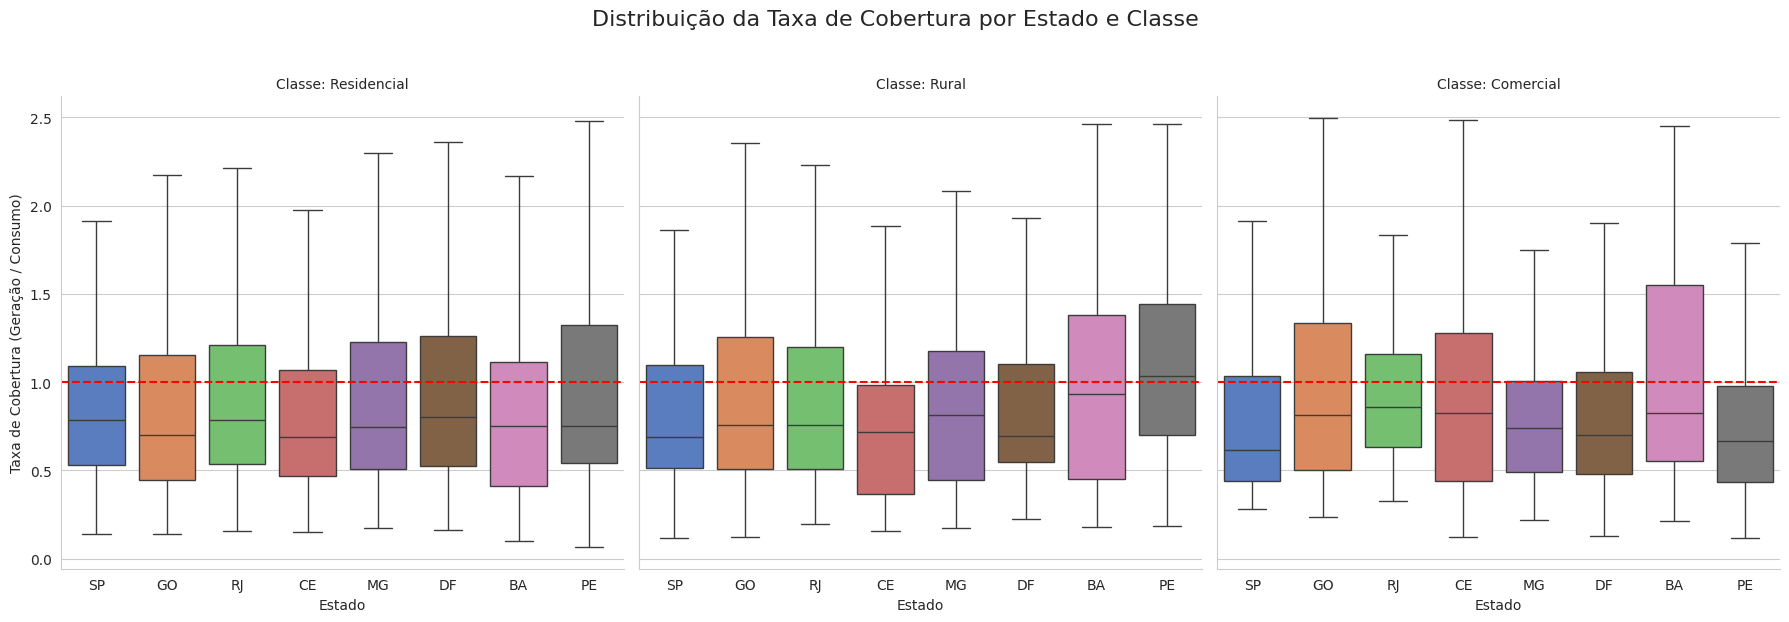

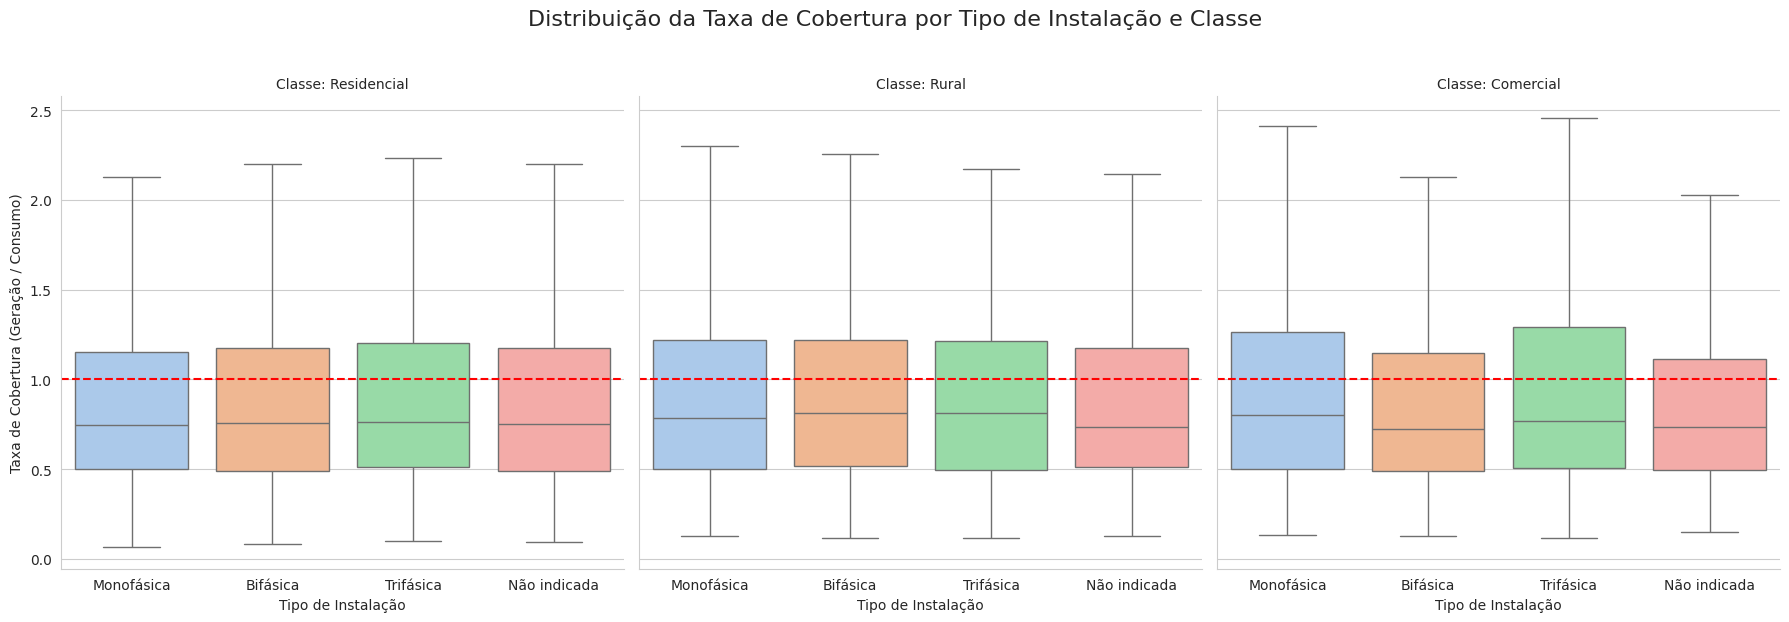

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'mes_referencia'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final['tipo_instalacao'] = (
    df_final['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)
df_final['mes'] = pd.to_datetime(df_final['mes_referencia']).dt.month
df_final.dropna(subset=['Estado', 'classe_consumo_x', 'tipo_instalacao', 'ConsumoKWH', 'kWhGerado'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ENGENHARIA DE ATRIBUTOS (CÁLCULO DA TAXA DE COBERTURA) ---
print("\nCalculando a taxa de cobertura para cada registro...")
# Evita divisão por zero substituindo 0 no consumo por NaN
df_final['taxa_cobertura'] = df_final['kWhGerado'] / df_final['ConsumoKWH'].replace(0, np.nan)
# Remove valores infinitos ou nulos que possam ter surgido
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final.dropna(subset=['taxa_cobertura'], inplace=True)

# Filtra outliers extremos para melhor visualização (taxas acima de 250% são raras e distorcem a escala)
df_plot = df_final[df_final['taxa_cobertura'] <= 2.5]


# --- PASSO 2: ANÁLISE POR ESTADO E CLASSE (TABELA + GRÁFICO) ---

# Tabela Numérica
print("\n--- Tabela: Taxa de Cobertura Mediana por Estado e Classe ---")
tabela_estado = pd.pivot_table(
    df_plot,
    values='taxa_cobertura',
    index='Estado',
    columns='classe_consumo_x',
    aggfunc='median' # A mediana corresponde à linha central do Box Plot
)
print((tabela_estado * 100).round(1).astype(str) + ' %')

# Gráfico
print("\nGerando o Gráfico 1 (Variação por Estado)...")
import matplotlib.pyplot as plt
import seaborn as sns

g_estado = sns.catplot(
    data=df_plot,
    x='Estado',
    y='taxa_cobertura',
    col='classe_consumo_x',
    kind='box',
    height=6,
    aspect=1,
    palette='muted',
    showfliers=False
)
g_estado.fig.suptitle('Distribuição da Taxa de Cobertura por Estado e Classe', y=1.03, fontsize=16)
g_estado.set_axis_labels("Estado", "Taxa de Cobertura (Geração / Consumo)")
g_estado.set_titles("Classe: {col_name}")
for ax in g_estado.axes.flat:
    ax.axhline(1.0, ls='--', color='red')
g_estado.tight_layout()
plt.savefig('cobertura_por_estado_classe.png')
print("Gráfico 'cobertura_por_estado_classe.png' salvo com sucesso.")


# --- PASSO 3: ANÁLISE POR TIPO DE INSTALAÇÃO E CLASSE (TABELA + GRÁFICO) ---

# Tabela Numérica
print("\n--- Tabela: Taxa de Cobertura Mediana por Tipo de Instalação e Classe ---")
tabela_instalacao = pd.pivot_table(
    df_plot,
    values='taxa_cobertura',
    index='tipo_instalacao',
    columns='classe_consumo_x',
    aggfunc='median'
)
# Reordena para uma ordem lógica
ordem_instalacao = ['Monofásica', 'Bifásica', 'Trifásica', 'Não indicada']
tabela_instalacao = tabela_instalacao.reindex(ordem_instalacao)
print((tabela_instalacao * 100).round(1).astype(str) + ' %')

# Gráfico
print("\nGerando o Gráfico 2 (Variação por Tipo de Instalação)...")
g_instalacao = sns.catplot(
    data=df_plot,
    x='tipo_instalacao',
    y='taxa_cobertura',
    col='classe_consumo_x',
    kind='box',
    order=ordem_instalacao,
    height=6,
    aspect=1,
    palette='pastel',
    showfliers=False
)
g_instalacao.fig.suptitle('Distribuição da Taxa de Cobertura por Tipo de Instalação e Classe', y=1.03, fontsize=16)
g_instalacao.set_axis_labels("Tipo de Instalação", "Taxa de Cobertura (Geração / Consumo)")
g_instalacao.set_titles("Classe: {col_name}")
for ax in g_instalacao.axes.flat:
    ax.axhline(1.0, ls='--', color='red')
g_instalacao.tight_layout()
plt.savefig('cobertura_por_instalacao_classe.png')
print("Gráfico 'cobertura_por_instalacao_classe.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Tabela de Economia Mensal Média (R$) por Estado e Classe ---
classe_consumo_x  Comercial  Residencial   Rural
Estado                                          
MG                   242.33       245.94  234.58
PE                   194.01       243.02  273.35
SP                   229.69       236.15  228.30
DF                   239.09       231.75  241.14
RJ                   269.89       230.76  250.77
CE                   262.23       218.28  197.51
GO                   239.52       215.00  210.82
BA                   263.54       213.58  256.66

--- Tabela de Economia Mensal Média (R$) por Cidade e Classe (Top 20 Cidades) ---
classe_consumo_x       Comercial  Residencial   Rural
cidade                                               
Belo Horizonte            209.59       272.77  261.01
Petrolina                 200.57       26

/tmp/ipython-input-3176476305.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')



Gráfico 'economia_media_por_estado_classe.png' salvo com sucesso.


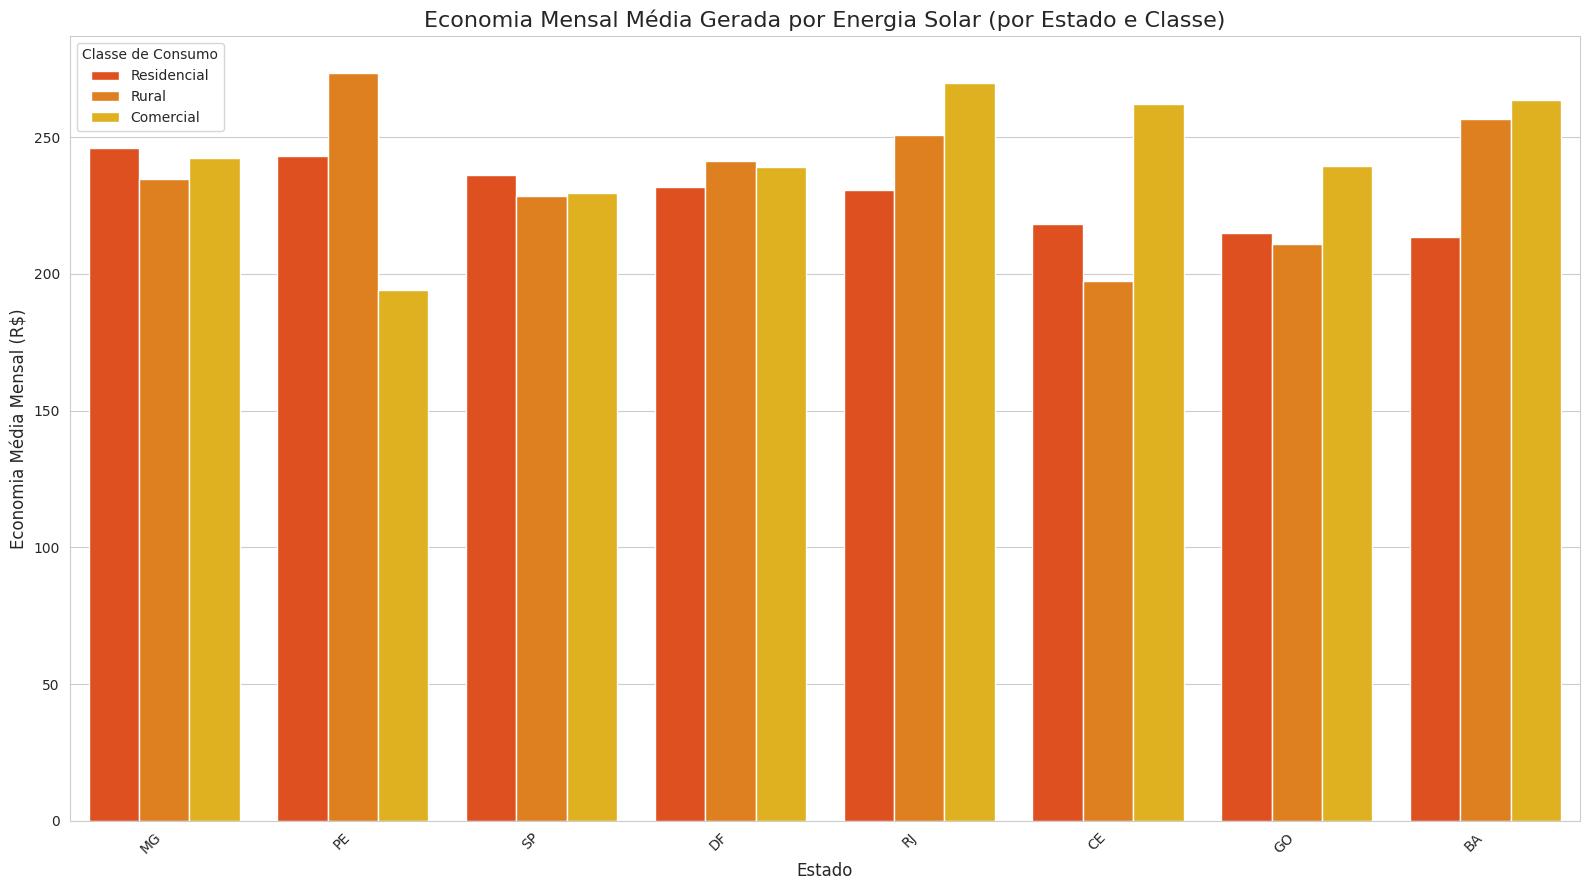

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAMe 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)
consumo_df['tipo_instalacao'] = (
    consumo_df['tipo_instalacao'].str.strip().str.lower()
    .replace({'n/i': 'Não indicada', 'bi': 'Bifásica', 'mono': 'Monofásica', 'monofasica': 'Monofásica', 'bifasica': 'Bifásica', 'trifasica': 'Trifásica'})
    .str.capitalize()
)
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['Estado', 'cidade', 'classe_consumo_x'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ENGENHARIA DE ATRIBUTOS (CÁLCULO DA ECONOMIA) ---
# A economia é o valor da energia gerada (kWhGerado * Tarifa)
df_final['economia_R$'] = df_final['kWhGerado'] * df_final['tarifa_aprox_R$']


# --- PASSO 2: ANÁLISE POR ESTADO ---
print("\n--- Tabela de Economia Mensal Média (R$) por Estado e Classe ---")
economia_por_estado = pd.pivot_table(
    df_final,
    values='economia_R$',
    index='Estado',
    columns='classe_consumo_x',
    aggfunc='mean'
).round(2)
# Ordena pela economia Residencial para fácil identificação
print(economia_por_estado.sort_values(by='Residencial', ascending=False))


# --- PASSO 3: ANÁLISE POR CIDADE ---
print("\n--- Tabela de Economia Mensal Média (R$) por Cidade e Classe (Top 20 Cidades) ---")
economia_por_cidade = pd.pivot_table(
    df_final,
    values='economia_R$',
    index='cidade',
    columns='classe_consumo_x',
    aggfunc='mean'
).round(2)
# Ordena e exibe as 20 principais cidades com maior economia residencial
print(economia_por_cidade.sort_values(by='Residencial', ascending=False).head(20))


# --- PASSO 4: VISUALIZAÇÃO POR ESTADO ---
print("\nGerando o gráfico de economia média por estado...")
import matplotlib.pyplot as plt
import seaborn as sns

# Define a ordem dos estados no gráfico com base na economia residencial média
ordem_estados = economia_por_estado.sort_values(by='Residencial', ascending=False).index

plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")

sns.barplot(
    data=df_final,
    x='Estado',
    y='economia_R$',
    hue='classe_consumo_x',
    order=ordem_estados,
    palette='autumn',
    errorbar=None
)

plt.title('Economia Mensal Média Gerada por Energia Solar (por Estado e Classe)', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Economia Média Mensal (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe de Consumo')
plt.tight_layout()

plt.savefig('economia_media_por_estado_classe.png')
print("\nGráfico 'economia_media_por_estado_classe.png' salvo com sucesso.")

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['areaTelhado_m2', 'qtdPaineis', 'kWhGerado', 'classe_consumo_x'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ANÁLISE DE CORRELAÇÃO EM CADEIA ---
print("\nCalculando correlações para testar a hipótese...")

resultados_correlacao = []
classes = df_final['classe_consumo_x'].unique()

# Itera sobre cada classe de consumo para calcular as correlações
for classe in classes:
    subset_df = df_final[df_final['classe_consumo_x'] == classe]

    # Hipótese 1: Telhados maiores -> Mais painéis
    corr_area_paineis = subset_df['areaTelhado_m2'].corr(subset_df['qtdPaineis'])

    # Hipótese 2: Mais painéis -> Maior produção
    corr_paineis_geracao = subset_df['qtdPaineis'].corr(subset_df['kWhGerado'])

    resultados_correlacao.append({
        'Classe': classe,
        'Corr(Área do Telhado x Qtd Painéis)': corr_area_paineis,
        'Corr(Qtd Painéis x kWh Gerado)': corr_paineis_geracao
    })

# Cria e exibe a tabela de resultados
tabela_resultados = pd.DataFrame(resultados_correlacao).set_index('Classe')

print("\n--- Tabela de Correlação para a Hipótese em Cadeia ---")
print(tabela_resultados.round(4))

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

Calculando correlações para testar a hipótese...

--- Tabela de Correlação para a Hipótese em Cadeia ---
             Corr(Área do Telhado x Qtd Painéis)  \
Classe                                             
Residencial                              -0.0388   
Rural                                     0.0927   
Comercial                                 0.0393   

             Corr(Qtd Painéis x kWh Gerado)  
Classe                                       
Residencial                          0.7414  
Rural                                0.7845  
Comercial                            0.7200  


/tmp/ipython-input-2068288789.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')


Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

Preparando os dados para a comparação...

--- Comparativo de Eficiência (Geração Média por Painel) ---
                    mean  median
status_orientacao               
Definida           32.37   32.06
Não Informada      32.45   32.00

Gerando o Gráfico de Violino para comparar as distribuições...


/tmp/ipython-input-124508726.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
/tmp/ipython-input-124508726.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(



Gráfico 'eficiencia_orientacao_definida_vs_nao_informada.png' salvo com sucesso.


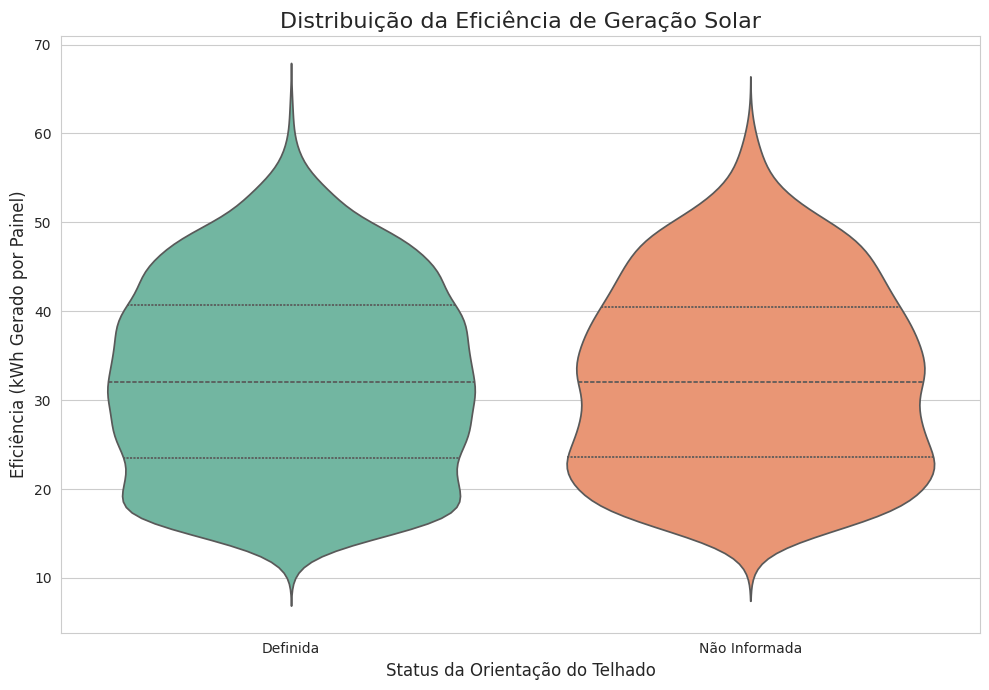

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    # Carrega os arquivos CSV
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
# Renomeia colunas para consistência
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)

# Converte datas e extrai ano/mês
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
# Une produção e consumo
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'mes_referencia'])
# Une com dados das residências para criar o DataFrame final
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')

# Limpa e padroniza a coluna 'classe_consumo_x' no DataFrame final
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
# Remove linhas com dados essenciais faltantes (sem remover as de orientação nula ainda)
df_final.dropna(subset=['qtdPaineis', 'kWhGerado'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: PREPARAÇÃO DOS DADOS PARA A ANÁLISE ---
print("\nPreparando os dados para a comparação...")

# 1. Padroniza todas as formas de "não informado" em uma única categoria
df_final['orientacaoTelhado'] = df_final['orientacaoTelhado'].str.lower().fillna('nao informada')
df_final['orientacaoTelhado'] = df_final['orientacaoTelhado'].replace(['n/a', 'null', ''], 'nao informada')

# 2. Cria a métrica de eficiência: Geração por Painel
#    Isso permite uma comparação justa entre sistemas de tamanhos diferentes.
df_final['geracao_por_painel'] = df_final['kWhGerado'] / df_final['qtdPaineis'].replace(0, np.nan)

# 3. Cria a coluna de agrupamento: 'Definida' vs. 'Não informada'
df_final['status_orientacao'] = np.where(
    df_final['orientacaoTelhado'] == 'nao informada',
    'Não Informada',
    'Definida'
)
# Remove quaisquer linhas onde o cálculo da eficiência falhou
df_final.dropna(subset=['geracao_por_painel'], inplace=True)


# --- PASSO 2: ANÁLISE NUMÉRICA ---
print("\n--- Comparativo de Eficiência (Geração Média por Painel) ---")
# Agrupa pelos dois status e calcula a média e a mediana da eficiência
comparativo_eficiencia = df_final.groupby('status_orientacao')['geracao_por_painel'].agg(['mean', 'median']).round(2)
print(comparativo_eficiencia)


# --- PASSO 3: ANÁLISE VISUAL ---
print("\nGerando o Gráfico de Violino para comparar as distribuições...")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

sns.violinplot(
    data=df_final,
    x='status_orientacao',
    y='geracao_por_painel',
    palette='Set2',
    inner='quartile' # Mostra a mediana e os quartis dentro do violino
)

plt.title('Distribuição da Eficiência de Geração Solar', fontsize=16)
plt.xlabel('Status da Orientação do Telhado', fontsize=12)
plt.ylabel('Eficiência (kWh Gerado por Painel)', fontsize=12)
plt.tight_layout()

plt.savefig('eficiencia_orientacao_definida_vs_nao_informada.png')
print("\nGráfico 'eficiencia_orientacao_definida_vs_nao_informada.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

Calculando a taxa de cobertura para cada registro...

--- Tabela: Taxa de Cobertura Média por Faixa de Painéis e Classe ---
classe_consumo_x Comercial Residencial    Rural
faixa_paineis                                  
(3.999, 7.75]       47.7 %      47.1 %   52.3 %
(7.75, 11.0]        82.9 %      86.1 %   91.2 %
(11.0, 15.0]       130.7 %     110.6 %  115.8 %
(15.0, 18.0]       156.0 %     154.3 %  176.7 %

Gerando o gráfico de dispersão com linha de tendência...


/tmp/ipython-input-2210856574.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
/tmp/ipython-input-2210856574.py:55: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabela_cobertura_paineis = pd.pivot_table(



Gráfico 'cobertura_vs_paineis.png' salvo com sucesso.


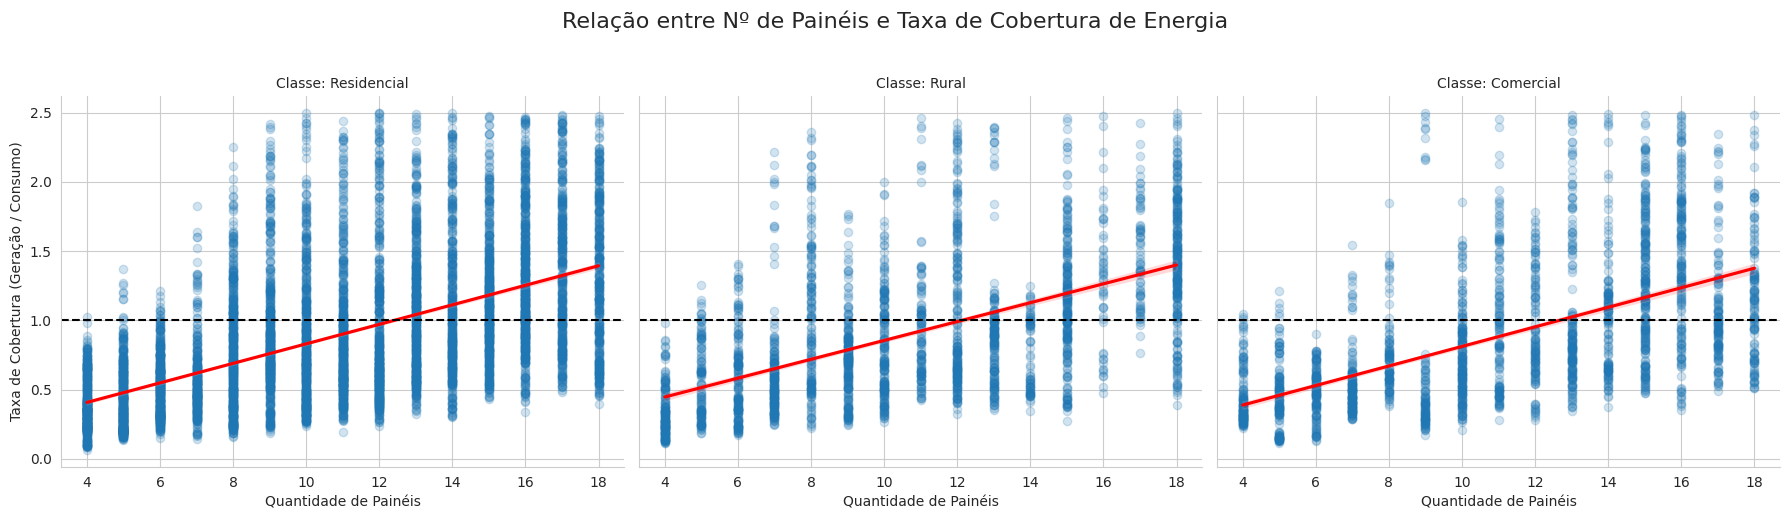

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'mes_referencia'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['classe_consumo_x', 'qtdPaineis', 'ConsumoKWH', 'kWhGerado'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ENGENHARIA DE ATRIBUTOS (CÁLCULO DA TAXA DE COBERTURA) ---
print("\nCalculando a taxa de cobertura para cada registro...")
# Evita divisão por zero substituindo 0 no consumo por NaN
df_final['taxa_cobertura'] = df_final['kWhGerado'] / df_final['ConsumoKWH'].replace(0, np.nan)
# Remove valores infinitos ou nulos que possam ter surgido
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final.dropna(subset=['taxa_cobertura'], inplace=True)


# --- PASSO 2: ANÁLISE NUMÉRICA (A TABELA) ---
print("\n--- Tabela: Taxa de Cobertura Média por Faixa de Painéis e Classe ---")
# Cria faixas (bins) para a quantidade de painéis para resumir os dados
# Usamos qcut para tentar criar faixas com um número similar de observações
try:
    df_final['faixa_paineis'] = pd.qcut(df_final['qtdPaineis'], q=4, duplicates='drop')

    # Cria a tabela pivotada com a média da taxa de cobertura para cada faixa
    tabela_cobertura_paineis = pd.pivot_table(
        df_final,
        values='taxa_cobertura',
        index='faixa_paineis',
        columns='classe_consumo_x',
        aggfunc='mean'
    )
    # Imprime a tabela formatada
    print((tabela_cobertura_paineis * 100).round(1).astype(str) + ' %')

except Exception as e:
    print(f"Não foi possível gerar a tabela de faixas. Erro: {e}")


# --- PASSO 3: ANÁLISE VISUAL (O GRÁFICO) ---
print("\nGerando o gráfico de dispersão com linha de tendência...")
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra outliers extremos para melhor visualização
df_plot = df_final[df_final['taxa_cobertura'] <= 2.5]

# Usamos lmplot para criar um gráfico de dispersão com uma linha de regressão
g = sns.lmplot(
    data=df_plot,
    x='qtdPaineis',
    y='taxa_cobertura',
    col='classe_consumo_x', # Cria uma coluna de gráficos para cada classe
    height=5,
    aspect=1.2,
    palette='muted',
    scatter_kws={'alpha': 0.2}, # Deixa os pontos mais transparentes
    line_kws={'color': 'red'}    # Destaca a linha de tendência
)

# Adiciona uma linha de referência em 1.0 (100% de cobertura)
for ax in g.axes.flat:
    ax.axhline(1.0, ls='--', color='black')

# Títulos e rótulos
g.fig.suptitle('Relação entre Nº de Painéis e Taxa de Cobertura de Energia', y=1.03, fontsize=16)
g.set_axis_labels("Quantidade de Painéis", "Taxa de Cobertura (Geração / Consumo)")
g.set_titles("Classe: {col_name}")
g.tight_layout()

plt.savefig('cobertura_vs_paineis.png')
print("\nGráfico 'cobertura_vs_paineis.png' salvo com sucesso.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

--- Resumo Estatístico dos Padrões de Consumo e Geração por Classe ---
                 ConsumoKWH                                 kWhGerado          \
                       mean  median     std     min     max      mean  median   
classe_consumo_x                                                                
Comercial            414.64  423.56  137.68  136.59  777.20    370.63  337.40   
Residencial          416.75  415.49  137.18  149.10  783.61    355.07  321.47   
Rural                404.33  397.21  140.78  150.39  781.90    363.69  320.27   

                                          
                     std    min      max  
classe_consumo_x                          
Comercial         186.82  60.69   994.73  
Residencial       189.39  41.72  1038.82  
Rural             196.56  45.74  1028.57  

Gerando os gráficos de '

/tmp/ipython-input-1117675343.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')


Gráfico 'padrao_consumo_geracao_residencial.png' salvo com sucesso.
Gráfico 'padrao_consumo_geracao_rural.png' salvo com sucesso.
Gráfico 'padrao_consumo_geracao_comercial.png' salvo com sucesso.

Análise de padrões finalizada.


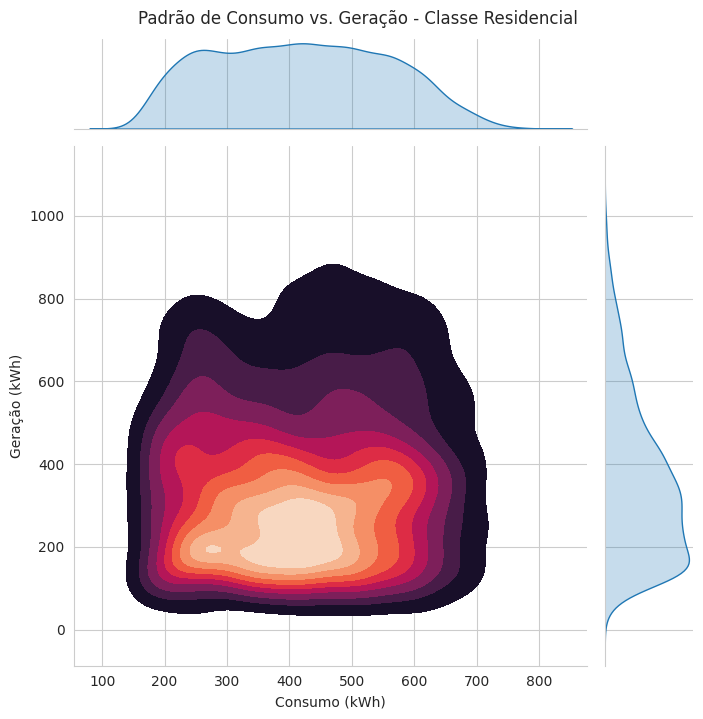

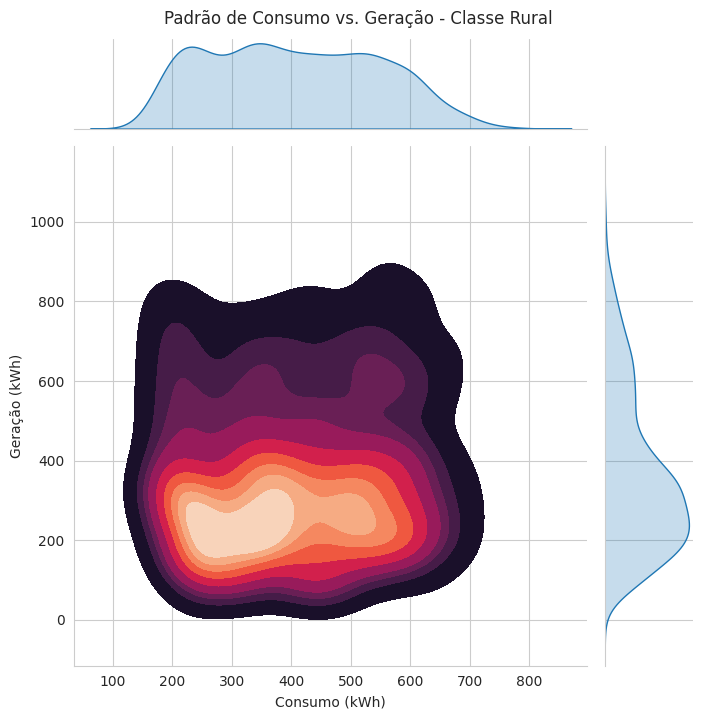

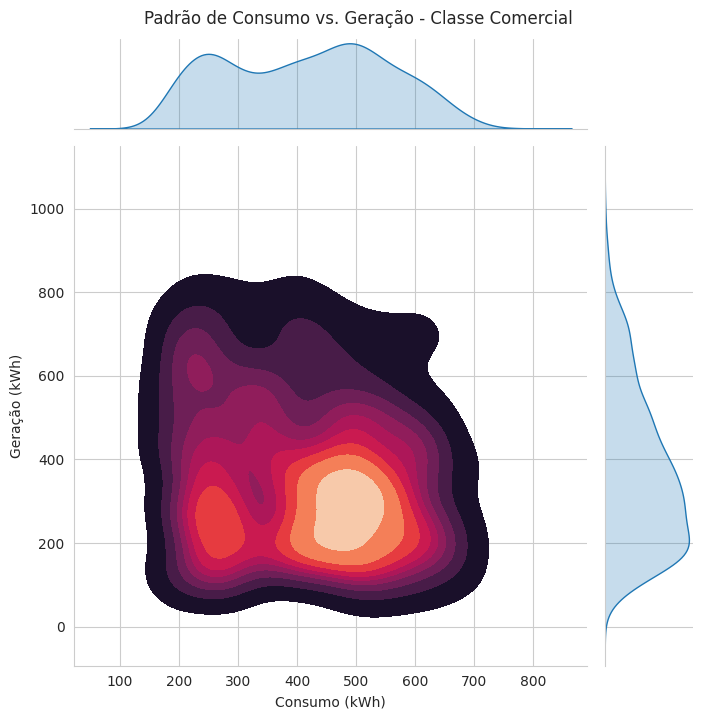

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
producao_df['ano'] = producao_df['mes_referencia'].dt.year
producao_df['mes'] = producao_df['mes_referencia'].dt.month
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
consumo_df['ano'] = consumo_df['mes_referencia'].dt.year
consumo_df['mes'] = consumo_df['mes_referencia'].dt.month
producao_df.drop(columns='mes_referencia', inplace=True)
consumo_df.drop(columns='mes_referencia', inplace=True)
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'ano', 'mes'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['classe_consumo_x', 'ConsumoKWH', 'kWhGerado'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: ANÁLISE NUMÉRICA (RESUMO ESTATÍSTICO) ---
print("\n--- Resumo Estatístico dos Padrões de Consumo e Geração por Classe ---")

# Cria um resumo estatístico detalhado para consumo e geração
resumo_estatistico = df_final.groupby('classe_consumo_x')[['ConsumoKWH', 'kWhGerado']].agg(['mean', 'median', 'std', 'min', 'max'])
print(resumo_estatistico.round(2))


# --- PASSO 2: ANÁLISE VISUAL (FINGERPRINT DE CADA CLASSE) ---
print("\nGerando os gráficos de 'fingerprint' para cada classe...")
import matplotlib.pyplot as plt
import seaborn as sns

# Itera sobre cada classe para criar um gráfico de densidade específico
for classe in df_final['classe_consumo_x'].unique():
    subset_df = df_final[df_final['classe_consumo_x'] == classe]

    # Cria um gráfico de densidade (kde) para visualizar o "hotspot" da classe
    g = sns.jointplot(
        data=subset_df,
        x='ConsumoKWH',
        y='kWhGerado',
        kind='kde', # Kernel Density Estimate -> Mapa de Calor
        fill=True,
        cmap='rocket',
        height=7
    )

    g.fig.suptitle(f'Padrão de Consumo vs. Geração - Classe {classe}', y=1.02)
    g.set_axis_labels('Consumo (kWh)', 'Geração (kWh)')

    # Salva o gráfico com um nome específico
    nome_arquivo = f'padrao_consumo_geracao_{classe.lower()}.png'
    plt.savefig(nome_arquivo)
    print(f"Gráfico '{nome_arquivo}' salvo com sucesso.")

print("\nAnálise de padrões finalizada.")

Arquivos CSV carregados com sucesso.
Iniciando limpeza e padronização dos dados...
Unindo os dataframes...
DataFrame 'df_final' recriado e limpo com sucesso.

Calculando a economia anual média por grupo...

--- Tabela: Economia Anual Média (R$) por Estado e Classe ---
classe_consumo_x  Comercial  Residencial    Rural
Estado                                           
BA                  3162.48      2562.98  3079.96
CE                  3146.75      2619.33  2370.14
DF                  2869.05      2780.94  2893.72
GO                  2874.26      2580.04  2529.85
MG                  2907.93      2951.26  2814.93
PE                  2328.12      2916.25  3280.16
RJ                  3238.64      2769.17  3009.29
SP                  2756.25      2833.80  2739.63

Gerando o Mapa de Calor da Economia Anual...


/tmp/ipython-input-3315256329.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')



Gráfico 'economia_anual_media_heatmap.png' salvo com sucesso.


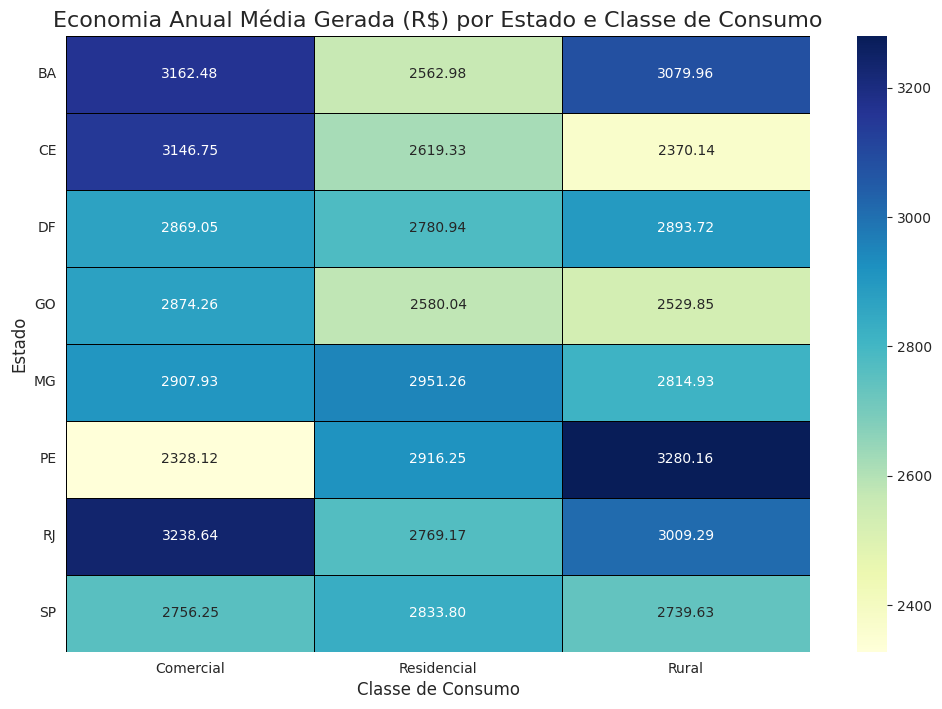

In [ ]:
# --- PASSO 0: RECONSTRUÇÃO COMPLETA DO DATAFRAME 'df_final' ---
# Necessário para garantir que a análise funcione em um ambiente reiniciado.

import pandas as pd
import numpy as np

try:
    residencias_df = pd.read_csv('residencias.csv')
    consumo_df = pd.read_csv('consumo.csv')
    producao_df = pd.read_csv('producao.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO CRÍTICO: Arquivos CSV não encontrados. Por favor, carregue os arquivos e tente novamente.")
    exit()

# --- Limpeza e Padronização ---
print("Iniciando limpeza e padronização dos dados...")
consumo_df.rename(columns={'resid': 'idResidencia', 'mesRef': 'mes_referencia'}, inplace=True)
producao_df.rename(columns={'resID': 'idResidencia', 'MesRef': 'mes_referencia'}, inplace=True)
producao_df['mes_referencia'] = pd.to_datetime(producao_df['mes_referencia'], errors='coerce')
consumo_df['mes_referencia'] = pd.to_datetime(consumo_df['mes_referencia'], errors='coerce')
residencias_df.rename(columns={'classe_consumo': 'classe_consumo_x'}, inplace=True)

# --- Merges e Cálculos ---
print("Unindo os dataframes...")
balanco_df = pd.merge(producao_df, consumo_df, on=['idResidencia', 'mes_referencia'])
df_final = pd.merge(balanco_df, residencias_df, on='idResidencia', how='left')
df_final['classe_consumo_x'] = (
    df_final['classe_consumo_x'].str.lower()
                                 .replace('resid.', 'residencial')
                                 .str.capitalize()
)
df_final.dropna(subset=['Estado', 'classe_consumo_x', 'kWhGerado', 'tarifa_aprox_R$'], inplace=True)
print("DataFrame 'df_final' recriado e limpo com sucesso.")
# --- FIM DA RECONSTRUÇÃO ---


# --- PASSO 1: CÁLCULO DA ECONOMIA ANUAL MÉDIA (A TABELA) ---
print("\nCalculando a economia anual média por grupo...")

# 1. Calcula a economia mensal para cada registro
df_final['economia_mensal_R$'] = df_final['kWhGerado'] * df_final['tarifa_aprox_R$']

# 2. Calcula a economia anual total para cada residência única
#    (assumindo que os dados cobrem um período de 12 meses por residência)
economia_anual_por_residencia = df_final.groupby(['idResidencia', 'Estado', 'classe_consumo_x'])['economia_mensal_R$'].sum().reset_index()
economia_anual_por_residencia.rename(columns={'economia_mensal_R$': 'economia_anual_R$'}, inplace=True)

# 3. Calcula a média da economia anual para cada grupo (Estado, Classe)
economia_media_anual_grupo = economia_anual_por_residencia.groupby(['Estado', 'classe_consumo_x'])['economia_anual_R$'].mean()

# 4. Formata como uma tabela pivotada e a imprime
tabela_economia = economia_media_anual_grupo.unstack().round(2)
print("\n--- Tabela: Economia Anual Média (R$) por Estado e Classe ---")
print(tabela_economia)


# --- PASSO 2: VISUALIZAÇÃO COM MAPA DE CALOR (O GRÁFICO) ---
print("\nGerando o Mapa de Calor da Economia Anual...")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    tabela_economia,
    annot=True,         # Escreve os valores em cada célula
    fmt='.2f',          # Formata os valores com 2 casas decimais
    cmap='YlGnBu',      # Paleta de cores (Yellow-Green-Blue)
    linewidths=.5,
    linecolor='black'
)

plt.title('Economia Anual Média Gerada (R$) por Estado e Classe de Consumo', fontsize=16)
plt.xlabel('Classe de Consumo', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.savefig('economia_anual_media_heatmap.png')
print("\nGráfico 'economia_anual_media_heatmap.png' salvo com sucesso.")